In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from colorama import Fore, Style, init
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import sklearn as sk
from sklearn.decomposition import PCA

In [2]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

In [4]:
data = pd.read_csv("/kaggle/input/playground-series-s3e21/sample_submission.csv", index_col='id')
df_copy=data
data.head()


target    O2_1   O2_2   O2_3   O2_4   O2_5   O2_6  O2_7  NH4_1  NH4_2  \
id                                                                          
0     8.59   7.500   9.00  9.545  9.265  8.110   8.43  7.15  0.180  0.200   
1     9.10  13.533  40.90  8.770  9.265  6.015  10.07  7.15  1.107  1.027   
2     8.21   3.710   5.42  8.770  9.265  4.550  10.07  7.15  0.020  0.020   
3     8.39   8.700   8.10  9.500  9.200  5.200   8.67  6.67  0.280  0.270   
4     8.07   8.050   8.65  7.960  9.265  3.290  10.07  7.15  0.360  0.435   

    ...  NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  BOD5_4  BOD5_5  BOD5_6  \
id  ...                                                                        
0   ...   4.95  1.730  1.800   4.800    3.15  10.665  10.465  16.645    5.75   
1   ...  20.05  9.530  7.695   4.550    6.95   2.040   5.200   5.725    2.95   
2   ...   4.58  3.025  3.960   4.935    4.95   4.725   6.075   6.750    3.50   
3   ...   8.45  2.070  1.730   6.300    4.70   3.500   6.200   8.670    2.90   
4   ...   2.02  1.730  0.760   4.800    4.97   3.950   2.800   8.400    3.50   

    BOD5_7  
id          
0    10.37  
1     2.23  
2     3.17  
3     7.37  
4     3.90  

[5 rows x 36 columns]

In [5]:
X = data.drop('target', axis=1)
y = data['target']


In [6]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X, y)


[-2.61056522 -1.01930614 -1.15758718 -1.0183318  -1.19130388]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

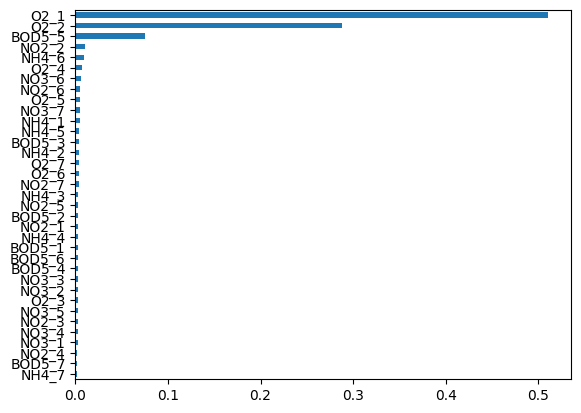

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nsmallest(35).plot(kind='barh')

#From least to increasing usefulness
X['NH4_7'].value = 0

In [10]:
df_copy.shape

(3500, 36)

<Axes: xlabel='O2_1', ylabel='O2_2'>

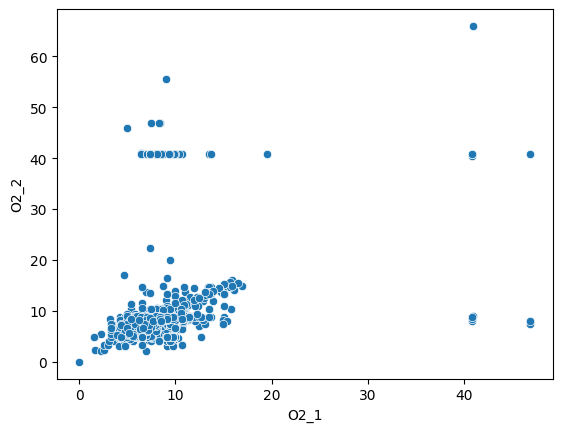

In [13]:
sns.scatterplot( data = data, x='O2_1', y = 'O2_2')

In [14]:
data.shape

(3500, 36)

In [15]:
data.describe().T.style.background_gradient(cmap="summer")

In [19]:
#Measuring correlation
orig_spearman = data.corr(method = 'spearman')
orig_kendall = data.corr(method = 'kendall')
orig_pearson = data.corr(method = 'pearson')

spearman_best_df = pd.DataFrame(orig_spearman['target']).sort_values(by = 'target', ascending = False)
kendall_best_df = pd.DataFrame(orig_kendall['target']).sort_values(by = 'target', ascending = False)
pearson_best_df = pd.DataFrame(orig_pearson['target']).sort_values(by = 'target', ascending = False)

#Function to Select values within a 0.02 - 0.98 IPR or other values can use function, replace those outside with NULL

def select_and_replace(lower_pct, upper_pct, columns, data):
    
    for column in columns:
        lower_pct_value = float(data[column].quantile(lower_pct))
        upper_pct_value = float(data[column].quantile(upper_pct))
        
        # Use boolean indexing to replace values outside the specified range with NaN
        data.loc[data[column] < lower_pct_value, column] = np.nan
        data.loc[data[column] > upper_pct_value, column] = np.nan
    
    # Remove rows with NaN values
    no_extreme_data = data.dropna(axis=0)
    return no_extreme_data

#Function to create features and target from processed dataset


In [20]:
def create_features_target(processed_data):
    
    X = processed_data.drop(columns = ['target'],
                  inplace = False)
    y = processed_data['target']
    
    return X, y

In [21]:
def plot_data_extremes(data):
    for column in data.columns:
        plt.figure(figsize = (8,8))
        sns.boxplot(data = orig,
                   x = orig[column])
        plt.title(f'{column} boxplot')

In [23]:
removed_highs = select_and_replace(0, 0.99, ['O2_2', 'O2_4', 'O2_5', 'NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2', 'NO2_3',
                                            'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2','NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 
                                            'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'], data)


removed_both = select_and_replace(0.01, 0.99, ['O2_3', 'O2_6', 'O2_7', 'BOD5_1', 'BOD5_2'], removed_highs)

removed_lows = select_and_replace(0.03, 1, ['NO2_4'], removed_both)


removed_lows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2656 entries, 0 to 3499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  2656 non-null   float64
 1   O2_1    2656 non-null   float64
 2   O2_2    2656 non-null   float64
 3   O2_3    2656 non-null   float64
 4   O2_4    2656 non-null   float64
 5   O2_5    2656 non-null   float64
 6   O2_6    2656 non-null   float64
 7   O2_7    2656 non-null   float64
 8   NH4_1   2656 non-null   float64
 9   NH4_2   2656 non-null   float64
 10  NH4_3   2656 non-null   float64
 11  NH4_4   2656 non-null   float64
 12  NH4_5   2656 non-null   float64
 13  NH4_6   2656 non-null   float64
 14  NH4_7   2656 non-null   float64
 15  NO2_1   2656 non-null   float64
 16  NO2_2   2656 non-null   float64
 17  NO2_3   2656 non-null   float64
 18  NO2_4   2656 non-null   float64
 19  NO2_5   2656 non-null   float64
 20  NO2_6   2656 non-null   float64
 21  NO2_7   2656 non-null   float64
 22  NO3_1

/tmp/ipykernel_33/3564904102.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column] < lower_pct_value, column] = np.nan
/tmp/ipykernel_33/3564904102.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column] > upper_pct_value, column] = np.nan
/tmp/ipykernel_33/3564904102.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column] < lower_pct_value, column] = np.nan
/tmp/ipykernel_33/3

In [24]:
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    print(style + color + text + Style.RESET_ALL)

In [25]:
data.isna().sum()

target     0
O2_1       0
O2_2       7
O2_3       0
O2_4      32
O2_5      35
O2_6       0
O2_7       0
NH4_1     35
NH4_2      1
NH4_3     34
NH4_4     17
NH4_5     34
NH4_6     28
NH4_7     13
NO2_1     22
NO2_2      1
NO2_3     22
NO2_4      0
NO2_5     34
NO2_6     35
NO2_7     25
NO3_1     29
NO3_2     34
NO3_3     35
NO3_4     30
NO3_5     32
NO3_6     19
NO3_7     32
BOD5_1     0
BOD5_2     0
BOD5_3     4
BOD5_4    34
BOD5_5    24
BOD5_6    35
BOD5_7     0
dtype: int64

In [26]:
data.duplicated().sum()

0

In [27]:
data.isnull().sum()

target     0
O2_1       0
O2_2       7
O2_3       0
O2_4      32
O2_5      35
O2_6       0
O2_7       0
NH4_1     35
NH4_2      1
NH4_3     34
NH4_4     17
NH4_5     34
NH4_6     28
NH4_7     13
NO2_1     22
NO2_2      1
NO2_3     22
NO2_4      0
NO2_5     34
NO2_6     35
NO2_7     25
NO3_1     29
NO3_2     34
NO3_3     35
NO3_4     30
NO3_5     32
NO3_6     19
NO3_7     32
BOD5_1     0
BOD5_2     0
BOD5_3     4
BOD5_4    34
BOD5_5    24
BOD5_6    35
BOD5_7     0
dtype: int64

In [28]:
PrintColor(f"\nData Information", color = Fore.BLUE)
display(data.info())


Data Information
<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 3499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  3500 non-null   float64
 1   O2_1    3500 non-null   float64
 2   O2_2    3493 non-null   float64
 3   O2_3    3500 non-null   float64
 4   O2_4    3468 non-null   float64
 5   O2_5    3465 non-null   float64
 6   O2_6    3500 non-null   float64
 7   O2_7    3500 non-null   float64
 8   NH4_1   3465 non-null   float64
 9   NH4_2   3499 non-null   float64
 10  NH4_3   3466 non-null   float64
 11  NH4_4   3483 non-null   float64
 12  NH4_5   3466 non-null   float64
 13  NH4_6   3472 non-null   float64
 14  NH4_7   3487 non-null   float64
 15  NO2_1   3478 non-null   float64
 16  NO2_2   3499 non-null   float64
 17  NO2_3   3478 non-null   float64
 18  NO2_4   3500 non-null   float64
 19  NO2_5   3466 non-null   float64
 20  NO2_6   3465 non-null   float64
 21  NO2_7   3475 non-null   

None

In [30]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.1)
    Q3 = data.quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)].dropna()
# Remove outliers from the specified column
df_no_outliers = remove_outliers_iqr(data)

In [31]:
data = df_no_outliers

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


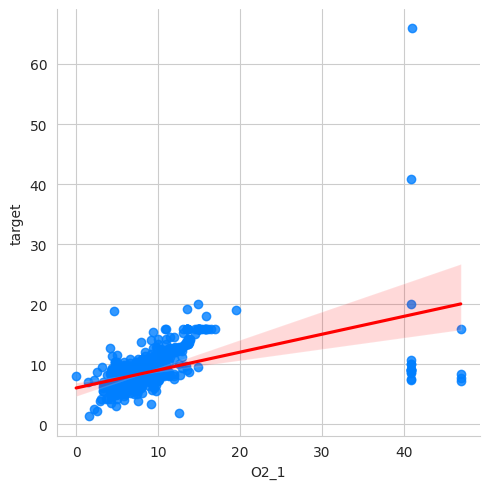

In [32]:
sns.set_style("whitegrid")
sns.lmplot(data = df_copy, x = "O2_1", y="target", scatter_kws={"color": '#007FFF'}, line_kws = {"color": 'red'})

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


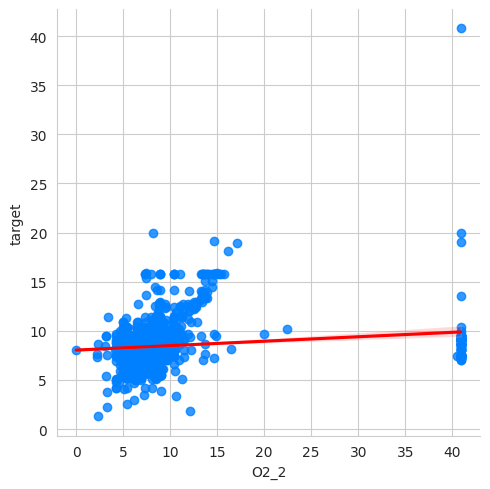

In [33]:
sns.set_style("whitegrid")
sns.lmplot(data = df_copy, x = "O2_2", y="target", scatter_kws={"color": '#007FFF'}, line_kws = {"color": 'red'})

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


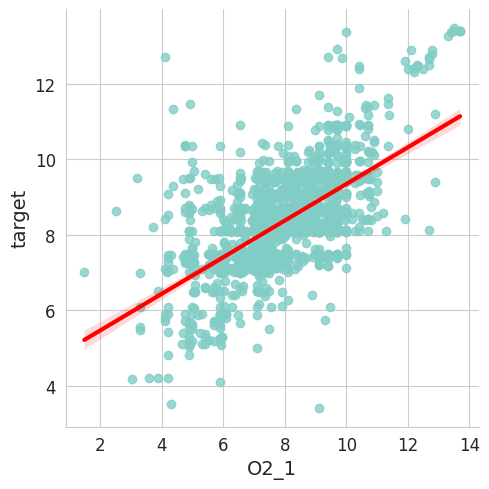

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom style parameters
custom_style = {
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (8, 6),
    'lines.linewidth': 2,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
}

# Apply custom style
plt.rcParams.update(custom_style)

# Your plot code here
sns.lmplot(data=data, x="O2_1", y="target", scatter_kws={"color": '#81cdc6'}, line_kws={"color": 'red'})

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


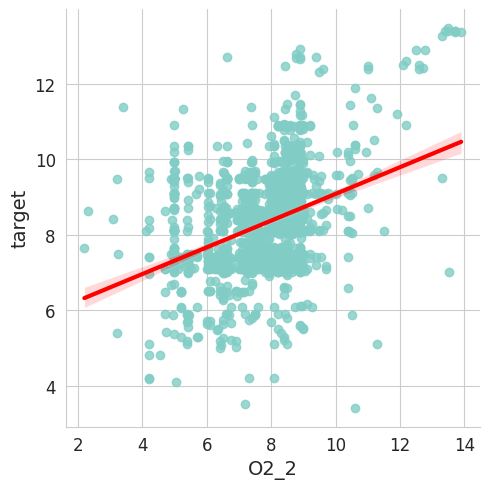

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom style parameters
custom_style = {
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (8, 6),
    'lines.linewidth': 2,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
}

# Apply custom style
plt.rcParams.update(custom_style)

# Your plot code here
sns.lmplot(data=data, x="O2_2", y="target", scatter_kws={"color": '#81cdc6'}, line_kws={"color": 'red'})

# Show the plot
plt.show()


In [43]:
y = data['target']
X = data.drop('target', axis=1)

In [44]:
Scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(Scaler.fit_transform(X), columns=X.columns)
numerical_scaled

O2_1      O2_2      O2_3      O2_4      O2_5      O2_6      O2_7  \
0     0.181818  0.275214  0.380857  0.730652  0.367709  0.596796  0.511649   
1     0.537265  0.551282  0.300100  0.730652  0.261200  0.596796  0.511649   
2     0.615070  0.581197  0.650548  0.712371  0.668639  0.451268  0.442204   
3     0.479934  0.504274  0.458126  0.712371  0.492392  0.451268  0.511649   
4     0.402129  0.529915  0.340977  0.563071  0.412088  0.596796  0.321685   
...        ...       ...       ...       ...       ...       ...       ...   
2209  0.623260  0.572650  0.380857  0.353443  0.261200  0.377837  0.511649   
2210  0.623260  0.237607  0.650548  0.712371  0.668639  0.451268  0.442204   
2211  0.563227  0.560684  0.892323  0.730652  0.822485  0.640854  0.511649   
2212  0.563227  0.532735  0.380857  0.353443  0.473373  0.640854  0.516129   
2213  0.574120  0.504274  0.458126  0.730652  0.668639  0.561415  0.511649   

         NH4_1     NH4_2     NH4_3  ...     NO3_5     NO3_6     NO3_7  \
0     0.000000  0.000000  0.216327  ...  0.226732  0.299632  0.415530   
1     0.354167  0.267742  0.216327  ...  0.098770  0.170892  0.079748   
2     0.229167  0.145161  0.216327  ...  1.000000  0.017795  0.188877   
3     0.291667  0.180645  0.620408  ...  0.098770  0.062133  0.873033   
4     0.229167  0.116129  0.216327  ...  0.387434  0.670941  0.873033   
...        ...       ...       ...  ...       ...       ...       ...   
2209  0.229167  0.116129  0.242449  ...  0.226732  0.170892  0.188877   
2210  0.166667  0.116129  0.216327  ...  0.387434  0.502933  0.709339   
2211  0.729167  0.519355  0.216327  ...  0.420174  0.170892  0.188877   
2212  0.427083  0.245161  0.705306  ...  1.000000  0.142062  0.188877   
2213  0.203125  0.116129  0.216327  ...  0.151255  0.170892  0.188877   

        BOD5_1    BOD5_2    BOD5_3    BOD5_4    BOD5_5    BOD5_6    BOD5_7  
0     0.415769  0.404762  0.366400  0.323447  0.463583  0.302115  0.179019  
1     0.402547  0.406832  0.283733  0.060922  0.625984  0.302115  0.262258  
2     0.179236  0.070393  0.366400  0.323447  0.625984  0.139577  0.319270  
3     0.392752  0.303313  0.283733  0.101002  0.625984  0.302115  0.239453  
4     0.275220  0.358178  0.705067  0.323447  0.625984  0.570997  0.672748  
...        ...       ...       ...       ...       ...       ...       ...  
2209  0.980411  0.611801  0.080000  0.323447  0.362697  0.235650  0.076397  
2210  0.292850  0.406832  0.283733  0.233267  0.463583  0.139577  0.319270  
2211  0.402547  0.406832  0.283733  0.323447  0.627461  0.338369  0.179019  
2212  0.409109  0.392650  0.366400  0.233267  0.625984  0.679758  0.296465  
2213  0.100881  0.153209  0.080000  0.000000  0.627461  0.235650  0.076397  

[2214 rows x 35 columns]

In [46]:
data.head()

target  O2_1  O2_2    O2_3   O2_4   O2_5   O2_6   O2_7  NH4_1  NH4_2  ...  \
id                                                                        ...   
2     8.21  3.71  5.42   8.770  9.265  4.550  10.07  7.150   0.02  0.020  ...   
4     8.07  8.05  8.65   7.960  9.265  3.290  10.07  7.150   0.36  0.435  ...   
5     8.12  9.00  9.00  11.475  9.115  8.110   8.98  6.375   0.24  0.245  ...   
7     7.65  7.35  8.10   9.545  9.115  6.025   8.98  7.150   0.30  0.300  ...   
8     6.40  6.40  8.40   8.370  7.890  5.075  10.07  5.030   0.24  0.200  ...   

     NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  BOD5_4  BOD5_5  BOD5_6  \
id                                                                         
2    4.580  3.025   3.96   4.935    4.95   4.725   6.075    6.75   3.500   
4    2.020  1.730   0.76   4.800    4.97   3.950   2.800    8.40   3.500   
5   20.050  0.190   1.80   2.520    1.72   4.725   6.075    8.40   2.155   
7    2.020  0.636   8.32   4.700    3.97   3.950   3.300    8.40   3.500   
8    7.795  6.760   8.32   3.500    4.50   7.900   6.075    8.40   5.725   

    BOD5_7  
id          
2     3.17  
4     3.90  
5     4.40  
7     3.70  
8     7.50  

[5 rows x 36 columns]

<Axes: >

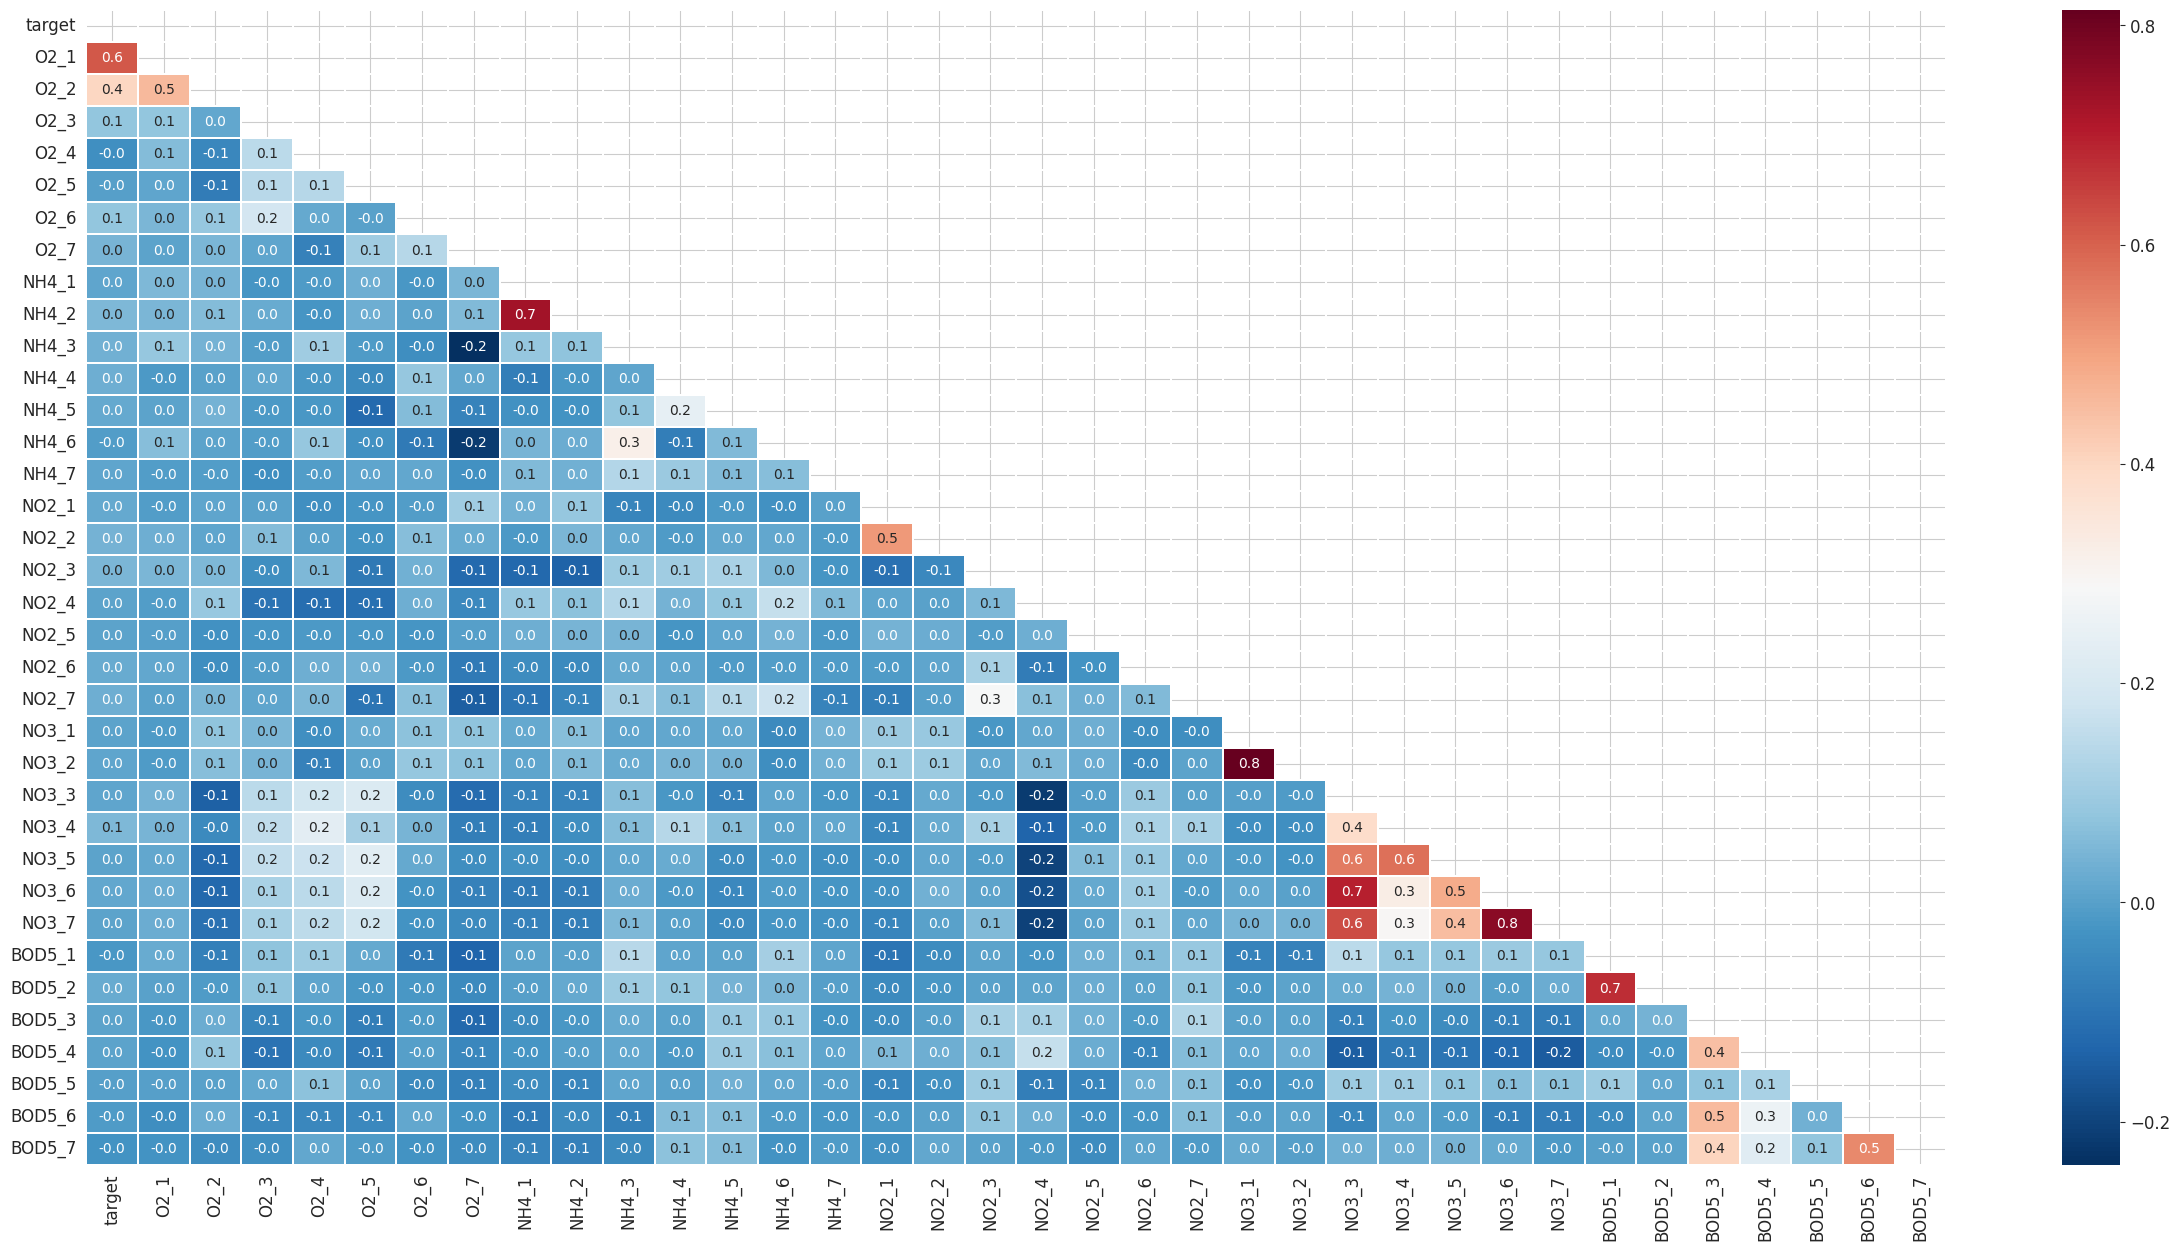

In [129]:
plt.figure(figsize = (30, 15))
corr_mat = data.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat,linecolor='white',linewidths=0.1, mask = mask, annot = True, fmt = '.1f', cmap = 'RdBu_r')

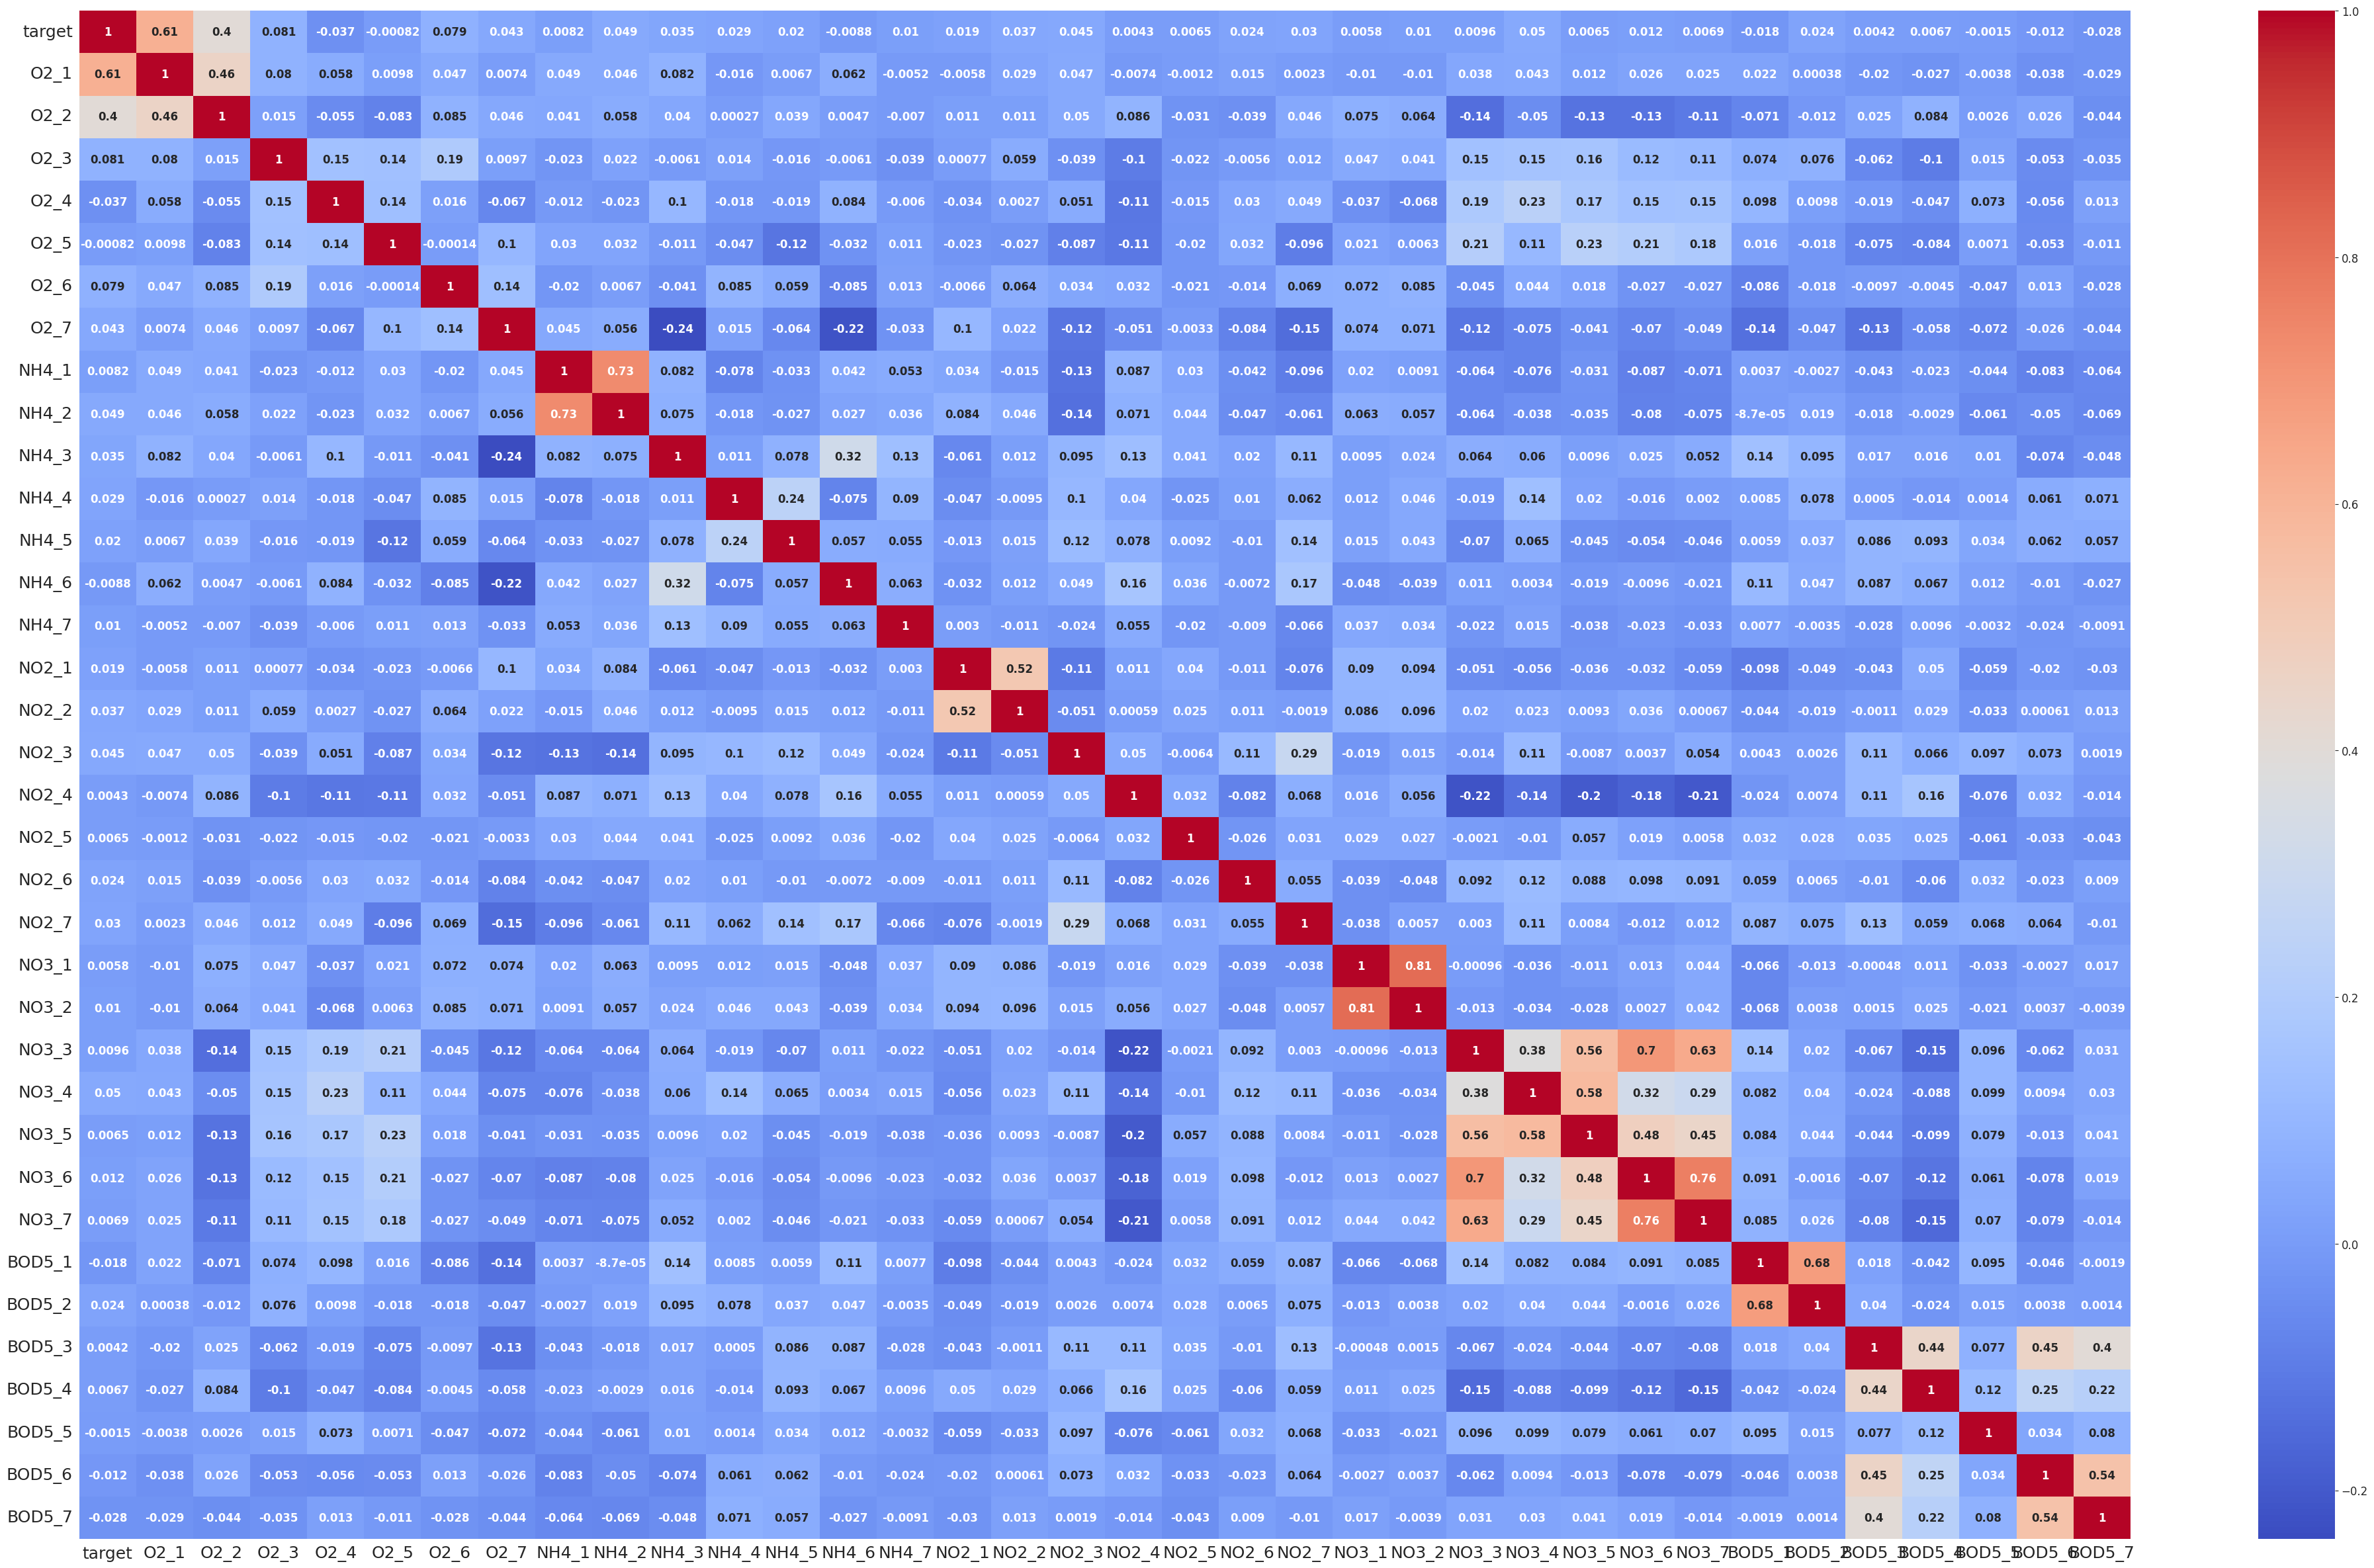

In [47]:
plt.figure(figsize=(50,30))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 12, "weight": "bold"})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [49]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: 
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
    return col_corr      

corr_features = correlation(data, 0.8)
corr_features

{'NO3_2'}

In [53]:
X.shape

(2214, 35)

In [54]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations of the target variable with other variables
correlations_with_target = correlation_matrix['target']

# Display the correlations with the target variable
print(correlations_with_target)

target    1.000000
O2_1      0.614393
O2_2      0.399701
O2_3      0.080620
O2_4     -0.036724
O2_5     -0.000821
O2_6      0.079234
O2_7      0.042882
NH4_1     0.008235
NH4_2     0.048655
NH4_3     0.034866
NH4_4     0.029392
NH4_5     0.019571
NH4_6    -0.008821
NH4_7     0.010364
NO2_1     0.018735
NO2_2     0.036795
NO2_3     0.045316
NO2_4     0.004289
NO2_5     0.006504
NO2_6     0.023874
NO2_7     0.030039
NO3_1     0.005841
NO3_2     0.010238
NO3_3     0.009632
NO3_4     0.050368
NO3_5     0.006534
NO3_6     0.011764
NO3_7     0.006902
BOD5_1   -0.017687
BOD5_2    0.023696
BOD5_3    0.004223
BOD5_4    0.006685
BOD5_5   -0.001454
BOD5_6   -0.012324
BOD5_7   -0.028409
Name: target, dtype: float64


In [55]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'))
rf.fit(X, y)

[-0.88073159 -0.93319153 -0.94910472 -0.9063966  -0.87819694]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

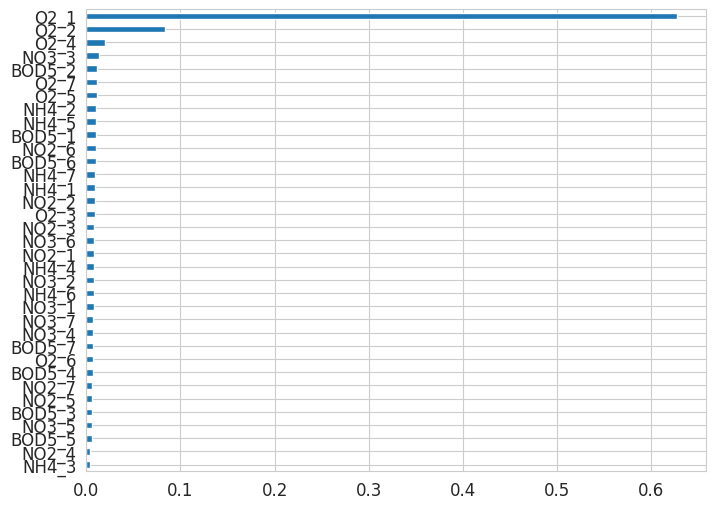

In [56]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nsmallest(35).plot(kind='barh')

#From least to increasing usefulness
X['NH4_7'].value = 0

In [57]:
sorted_corr = feat_importances.sort_values(ascending=False)

# Get the top n rows from the sorted DataFrame
top_n_rows = sorted_corr.head(10)
top_n_rows

O2_1      0.626884
O2_2      0.083325
O2_4      0.019927
NO3_3     0.013772
BOD5_2    0.011916
O2_7      0.011758
O2_5      0.011723
NH4_2     0.010739
NH4_5     0.010489
BOD5_1    0.010283
dtype: float64

In [58]:
top_n_rows1 = pd.DataFrame(top_n_rows)
top_n_rows1.reset_index(names = "column_name", inplace=True)
top_n_rows1['column_name'].unique()

array(['O2_1', 'O2_2', 'O2_4', 'NO3_3', 'BOD5_2', 'O2_7', 'O2_5', 'NH4_2',
       'NH4_5', 'BOD5_1'], dtype=object)

In [59]:
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [60]:
X_pca

array([[-4.86351122, 13.30390127,  5.31643183,  6.81883134,  1.01997517],
       [-8.99129406, -8.1928399 ,  0.21766377,  0.17014152,  0.93650769],
       [16.62897844, -8.20236426, -1.50471795, -0.83786972, -1.23051869],
       ...,
       [ 5.22926557, -0.64129033,  1.15036462, -7.86393156,  0.73220224],
       [12.26091297, -6.30168905, -2.14904763, -6.40022091, -7.49788604],
       [ 1.03179373, 16.12391963, -4.98477904, -8.935746  ,  4.83396352]])

In [61]:
X_pca = pd.DataFrame(X_pca)

In [62]:
X_pca

0          1         2         3         4
0     -4.863511  13.303901  5.316432  6.818831  1.019975
1     -8.991294  -8.192840  0.217664  0.170142  0.936508
2     16.628978  -8.202364 -1.504718 -0.837870 -1.230519
3      1.466670  -6.878496  2.341868 -9.409470  6.610578
4      2.244122  -3.040404 -5.245070  6.224524  5.803624
...         ...        ...       ...       ...       ...
2209   1.936178   3.569696 -0.782332 -9.373407  3.721750
2210   0.039242  -7.092157 -5.215503  2.735779  2.829943
2211   5.229266  -0.641290  1.150365 -7.863932  0.732202
2212  12.260913  -6.301689 -2.149048 -6.400221 -7.497886
2213   1.031794  16.123920 -4.984779 -8.935746  4.833964

[2214 rows x 5 columns]

In [63]:
print(cross_val_score(rf, X_pca, y, cv = 5, scoring = 'neg_mean_squared_error'))
rf.fit(X_pca, y)

[-1.52054853 -1.38602544 -1.63087012 -1.45738867 -1.37005973]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [64]:
Scaler = MinMaxScaler()
X_scaled = pd.DataFrame(Scaler.fit_transform(X_pca), columns=X_pca.columns)
X_scaled

0         1         2         3         4
0     0.224181  0.763384  0.598382  0.687282  0.479137
1     0.096394  0.145019  0.425456  0.450731  0.475952
2     0.889542  0.144745  0.367041  0.414867  0.393273
3     0.420150  0.182827  0.497499  0.109902  0.692437
4     0.444218  0.293231  0.240187  0.666138  0.661649
...        ...       ...       ...       ...       ...
2209  0.434685  0.483374  0.391541  0.111185  0.582218
2210  0.375960  0.176681  0.241189  0.542013  0.548193
2211  0.536632  0.362243  0.457089  0.164890  0.468157
2212  0.754316  0.199419  0.345189  0.216967  0.154151
2213  0.406687  0.844503  0.249014  0.126756  0.624653

[2214 rows x 5 columns]

In [65]:
print(cross_val_score(rf, X_scaled, y, cv = 5, scoring = 'neg_mean_squared_error'))
rf.fit(X_scaled, y)

[-1.52053119 -1.38605094 -1.63089712 -1.45740802 -1.3700297 ]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [66]:
sk.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [67]:
X.columns

Index(['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7', 'NH4_1',
       'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2',
       'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2', 'NO3_3',
       'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2', 'BOD5_3',
       'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'],
      dtype='object')

In [68]:
def create_and_select_arithmetic_features(dataset, target_column, num_features_to_keep=10):
    # Copy the original dataset to avoid modifying the original data
    dataset_copy = dataset.copy()
    
    # List of columns on which you want to perform arithmetic operations
    columns_to_operate_on = ['O2_1', 'O2_2', 'O2_4', 'BOD5_6', 'NO3_3']  # Replace with your column names
    
    # Initialize a list to store the newly created feature DataFrames
    new_feature_dfs = []
    
    # Create new features by applying arithmetic operations
    for col1 in columns_to_operate_on:
        for col2 in columns_to_operate_on:
            if col1 != col2:  # Avoid applying operations on the same column
                # Addition
                addition_df = dataset_copy[col1] + dataset_copy[col2]
                addition_df.rename(f'{col1}_plus_{col2}', inplace=True)
                new_feature_dfs.append(addition_df)
                
                # Subtraction
                subtraction_df = dataset_copy[col1] - dataset_copy[col2]
                subtraction_df.rename(f'{col1}_minus_{col2}', inplace=True)
                new_feature_dfs.append(subtraction_df)
                
                # Multiplication
                multiplication_df = dataset_copy[col1] * dataset_copy[col2]
                multiplication_df.rename(f'{col1}_times_{col2}', inplace=True)
                new_feature_dfs.append(multiplication_df)
                
                # Division (avoid division by zero)
                division_df = dataset_copy[col1] / (dataset_copy[col2] + 1e-5)
                division_df.rename(f'{col1}_divided_by_{col2}', inplace=True)
                new_feature_dfs.append(division_df)
    
    # Concatenate all the new feature DataFrames
    new_features = pd.concat(new_feature_dfs, axis=1)
    
    # Combine the new features with the target variable
    selected_dataset = pd.concat([new_features, dataset_copy[target_column]], axis=1)
    
    # Split the dataset into features (X) and the target variable (y)
    X = selected_dataset.drop(columns=[target_column])
    y = selected_dataset[target_column]
    
    # Use a RandomForestClassifier to get feature importances
    rf.fit(X, y)
    
    # Get feature importances
    feature_importances = rf.feature_importances_
    
    # Sort feature importances and get the indices of the top N features
    top_features_indices = feature_importances.argsort()[-num_features_to_keep:][::-1]
    
    # Select only the top N features
    selected_features = [X.columns[i] for i in top_features_indices]
    
    # Create a new dataset with only the selected features
    X_selected = X[selected_features]
    
    # Add the target variable back to the selected dataset
    selected_dataset = pd.concat([X_selected, y], axis=1)
    
    return selected_dataset

In [70]:
df_1 = create_and_select_arithmetic_features(data, 'target')

In [71]:
df_1.head()

O2_2_times_O2_1  O2_1_times_O2_2  O2_1_plus_O2_2  O2_2_plus_O2_1  \
id                                                                     
2           20.1082          20.1082            9.13            9.13   
4           69.6325          69.6325           16.70           16.70   
5           81.0000          81.0000           18.00           18.00   
7           59.5350          59.5350           15.45           15.45   
8           53.7600          53.7600           14.80           14.80   

    O2_1_minus_O2_4  O2_4_minus_O2_1  NO3_3_plus_O2_1  O2_1_plus_NO3_3  \
id                                                                       
2            -5.555            5.555            7.670            7.670   
4            -1.215            1.215           10.145           10.145   
5            -0.115            0.115           23.670           23.670   
7            -1.765            1.765            9.445            9.445   
8            -1.490            1.490           18.490           18.490   

    O2_2_divided_by_O2_1  O2_1_divided_by_O2_2  target  
id                                                      
2               1.460913              0.684501    8.21  
4               1.074533              0.930635    8.07  
5               0.999999              0.999999    8.12  
7               1.102039              0.907406    7.65  
8               1.312498              0.761904    6.40

In [72]:
df_1.shape

(2214, 11)

In [76]:
df_1 = pd.DataFrame(df_1)

In [77]:
X1 = df_1.drop('target', axis=1)
y1 = df_1['target']

In [78]:
print(cross_val_score(rf, X1, y1, cv = 5, scoring = 'neg_mean_squared_error'))
rf.fit(X1, y1)

[-0.76884979 -0.90817745 -0.98075146 -0.80830079 -0.80294062]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

<Axes: >

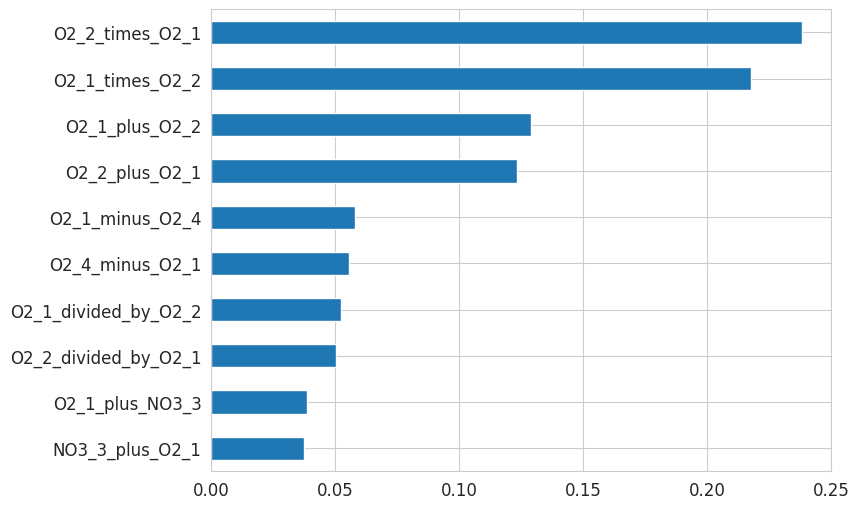

In [79]:
feat_importances = pd.Series(rf.feature_importances_, index=X1.columns)
feat_importances.nsmallest(35).plot(kind='barh')

In [80]:
Scaler = MinMaxScaler()
X_scaled = pd.DataFrame(Scaler.fit_transform(X1), columns=X1.columns)
X_scaled

O2_2_times_O2_1  O2_1_times_O2_2  O2_1_plus_O2_2  O2_2_plus_O2_1  \
0            0.078557         0.078557        0.190518        0.190518   
1            0.350864         0.350864        0.525919        0.525919   
2            0.413368         0.413368        0.583518        0.583518   
3            0.295344         0.295344        0.470536        0.470536   
4            0.263590         0.263590        0.441737        0.441737   
...               ...              ...             ...             ...   
2209         0.413313         0.413313        0.583518        0.583518   
2210         0.217172         0.217172        0.409836        0.409836   
2211         0.371002         0.371002        0.544838        0.544838   
2212         0.355958         0.355958        0.530350        0.530350   
2213         0.346562         0.346562        0.521489        0.521489   

      O2_1_minus_O2_4  O2_4_minus_O2_1  NO3_3_plus_O2_1  O2_1_plus_NO3_3  \
0            0.025577         0.974423         0.171099         0.171099   
1            0.333925         0.666075         0.274764         0.274764   
2            0.412078         0.587922         0.841257         0.841257   
3            0.294849         0.705151         0.245445         0.245445   
4            0.314387         0.685613         0.624293         0.624293   
...               ...              ...              ...              ...   
2209         0.628419         0.371581         0.318743         0.318743   
2210         0.419183         0.580817         0.483351         0.483351   
2211         0.356448         0.643552         0.288042         0.288042   
2212         0.576341         0.423659         0.284901         0.284901   
2213         0.365897         0.634103         0.293613         0.293613   

      O2_2_divided_by_O2_1  O2_1_divided_by_O2_2  
0                 0.378214              0.134727  
1                 0.250515              0.220792  
2                 0.225881              0.245046  
3                 0.259606              0.212670  
4                 0.329163              0.161793  
...                    ...                   ...  
2209              0.218618              0.252904  
2210              0.076248              0.534326  
2211              0.241405              0.229359  
2212              0.228488              0.242310  
2213              0.210329              0.262314  

[2214 rows x 10 columns]

In [81]:
print(cross_val_score(rf, X_scaled, y1, cv = 5, scoring = 'neg_mean_squared_error'))
rf.fit(X_scaled, y1)

[-0.76852174 -0.90883585 -0.98032355 -0.80756049 -0.80386921]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [82]:
X_scaled.shape

(2214, 10)

In [83]:
X.shape

(2214, 35)

In [85]:
X=pd.DataFrame(X)
X_scaled = pd.DataFrame(X_scaled)

In [86]:
X = X.reset_index(drop=True)

In [88]:
X = X.rename_axis('ID')

In [89]:
X.head()

O2_1  O2_2    O2_3   O2_4   O2_5   O2_6   O2_7  NH4_1  NH4_2  NH4_3  ...  \
ID                                                                       ...   
0   3.71  5.42   8.770  9.265  4.550  10.07  7.150   0.02  0.020   0.65  ...   
1   8.05  8.65   7.960  9.265  3.290  10.07  7.150   0.36  0.435   0.65  ...   
2   9.00  9.00  11.475  9.115  8.110   8.98  6.375   0.24  0.245   0.65  ...   
3   7.35  8.10   9.545  9.115  6.025   8.98  7.150   0.30  0.300   1.64  ...   
4   6.40  8.40   8.370  7.890  5.075  10.07  5.030   0.24  0.200   0.65  ...   

     NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  BOD5_4  BOD5_5  BOD5_6  \
ID                                                                         
0    4.580  3.025   3.96   4.935    4.95   4.725   6.075    6.75   3.500   
1    2.020  1.730   0.76   4.800    4.97   3.950   2.800    8.40   3.500   
2   20.050  0.190   1.80   2.520    1.72   4.725   6.075    8.40   2.155   
3    2.020  0.636   8.32   4.700    3.97   3.950   3.300    8.40   3.500   
4    7.795  6.760   8.32   3.500    4.50   7.900   6.075    8.40   5.725   

    BOD5_7  
ID          
0     3.17  
1     3.90  
2     4.40  
3     3.70  
4     7.50  

[5 rows x 35 columns]

In [90]:
X_scaled = X_scaled.rename_axis('ID')
X_scaled.head()

O2_2_times_O2_1  O2_1_times_O2_2  O2_1_plus_O2_2  O2_2_plus_O2_1  \
ID                                                                     
0          0.078557         0.078557        0.190518        0.190518   
1          0.350864         0.350864        0.525919        0.525919   
2          0.413368         0.413368        0.583518        0.583518   
3          0.295344         0.295344        0.470536        0.470536   
4          0.263590         0.263590        0.441737        0.441737   

    O2_1_minus_O2_4  O2_4_minus_O2_1  NO3_3_plus_O2_1  O2_1_plus_NO3_3  \
ID                                                                       
0          0.025577         0.974423         0.171099         0.171099   
1          0.333925         0.666075         0.274764         0.274764   
2          0.412078         0.587922         0.841257         0.841257   
3          0.294849         0.705151         0.245445         0.245445   
4          0.314387         0.685613         0.624293         0.624293   

    O2_2_divided_by_O2_1  O2_1_divided_by_O2_2  
ID                                              
0               0.378214              0.134727  
1               0.250515              0.220792  
2               0.225881              0.245046  
3               0.259606              0.212670  
4               0.329163              0.161793

In [91]:
X_scaled.isna().sum()

O2_2_times_O2_1         0
O2_1_times_O2_2         0
O2_1_plus_O2_2          0
O2_2_plus_O2_1          0
O2_1_minus_O2_4         0
O2_4_minus_O2_1         0
NO3_3_plus_O2_1         0
O2_1_plus_NO3_3         0
O2_2_divided_by_O2_1    0
O2_1_divided_by_O2_2    0
dtype: int64

In [92]:
X = X.merge(X_scaled, on='ID', how='left')
X.shape

(2214, 45)

In [93]:
X.isna().sum()

O2_1                    0
O2_2                    0
O2_3                    0
O2_4                    0
O2_5                    0
O2_6                    0
O2_7                    0
NH4_1                   0
NH4_2                   0
NH4_3                   0
NH4_4                   0
NH4_5                   0
NH4_6                   0
NH4_7                   0
NO2_1                   0
NO2_2                   0
NO2_3                   0
NO2_4                   0
NO2_5                   0
NO2_6                   0
NO2_7                   0
NO3_1                   0
NO3_2                   0
NO3_3                   0
NO3_4                   0
NO3_5                   0
NO3_6                   0
NO3_7                   0
BOD5_1                  0
BOD5_2                  0
BOD5_3                  0
BOD5_4                  0
BOD5_5                  0
BOD5_6                  0
BOD5_7                  0
O2_2_times_O2_1         0
O2_1_times_O2_2         0
O2_1_plus_O2_2          0
O2_2_plus_O2

In [94]:
print(cross_val_score(rf, X, y, cv = 5, scoring = 'neg_mean_squared_error'))
rf.fit(X, y)

[-0.74712526 -0.87036714 -0.87766618 -0.79039289 -0.76609248]


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

<Axes: >

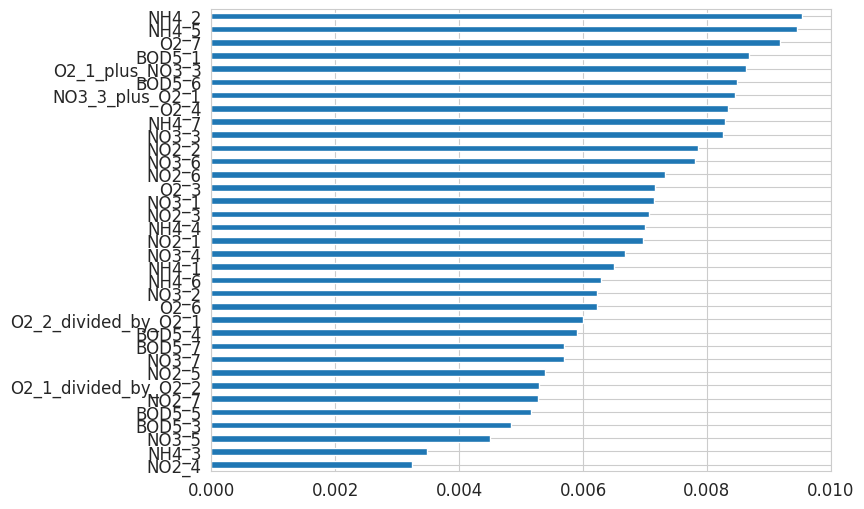

In [95]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nsmallest(35).plot(kind='barh')

In [98]:
y = y.reset_index(drop=True)
y = y.rename_axis('ID')
y.head()

target
ID        
0     8.21
1     8.07
2     8.12
3     7.65
4     6.40

In [99]:
y = pd.DataFrame(y)
y.head()

target
ID        
0     8.21
1     8.07
2     8.12
3     7.65
4     6.40

In [100]:
df_11 = X.merge(y, on='ID', how='left')
df_11

O2_1   O2_2    O2_3   O2_4   O2_5    O2_6   O2_7  NH4_1  NH4_2  NH4_3  \
ID                                                                             
0     3.710  5.420   8.770  9.265  4.550  10.070  7.150  0.020  0.020  0.650   
1     8.050  8.650   7.960  9.265  3.290  10.070  7.150  0.360  0.435  0.650   
2     9.000  9.000  11.475  9.115  8.110   8.980  6.375  0.240  0.245  0.650   
3     7.350  8.100   9.545  9.115  6.025   8.980  7.150  0.300  0.300  1.640   
4     6.400  8.400   8.370  7.890  5.075  10.070  5.030  0.240  0.200  0.650   
...     ...    ...     ...    ...    ...     ...    ...    ...    ...    ...   
2209  9.100  8.900   8.770  6.170  3.290   8.430  7.150  0.240  0.200  0.714   
2210  9.100  4.980  11.475  9.115  8.110   8.980  6.375  0.180  0.200  0.650   
2211  8.367  8.760  13.900  9.265  9.930  10.400  7.150  0.720  0.825  0.650   
2212  8.367  8.433   8.770  6.170  5.800  10.400  7.200  0.430  0.400  1.848   
2213  8.500  8.100   9.545  9.265  8.110   9.805  7.150  0.215  0.200  0.650   

      ...  O2_1_times_O2_2  O2_1_plus_O2_2  O2_2_plus_O2_1  O2_1_minus_O2_4  \
ID    ...                                                                     
0     ...         0.078557        0.190518        0.190518         0.025577   
1     ...         0.350864        0.525919        0.525919         0.333925   
2     ...         0.413368        0.583518        0.583518         0.412078   
3     ...         0.295344        0.470536        0.470536         0.294849   
4     ...         0.263590        0.441737        0.441737         0.314387   
...   ...              ...             ...             ...              ...   
2209  ...         0.413313        0.583518        0.583518         0.628419   
2210  ...         0.217172        0.409836        0.409836         0.419183   
2211  ...         0.371002        0.544838        0.544838         0.356448   
2212  ...         0.355958        0.530350        0.530350         0.576341   
2213  ...         0.346562        0.521489        0.521489         0.365897   

      O2_4_minus_O2_1  NO3_3_plus_O2_1  O2_1_plus_NO3_3  O2_2_divided_by_O2_1  \
ID                                                                              
0            0.974423         0.171099         0.171099              0.378214   
1            0.666075         0.274764         0.274764              0.250515   
2            0.587922         0.841257         0.841257              0.225881   
3            0.705151         0.245445         0.245445              0.259606   
4            0.685613         0.624293         0.624293              0.329163   
...               ...              ...              ...                   ...   
2209         0.371581         0.318743         0.318743              0.218618   
2210         0.580817         0.483351         0.483351              0.076248   
2211         0.643552         0.288042         0.288042              0.241405   
2212         0.423659         0.284901         0.284901              0.228488   
2213         0.634103         0.293613         0.293613              0.210329   

      O2_1_divided_by_O2_2  target  
ID                                  
0                 0.134727    8.21  
1                 0.220792    8.07  
2                 0.245046    8.12  
3                 0.212670    7.65  
4                 0.161793    6.40  
...                    ...     ...  
2209              0.252904    9.30  
2210              0.534326    7.49  
2211              0.229359    8.65  
2212              0.242310    9.95  
2213              0.262314    8.51  

[2214 rows x 46 columns]

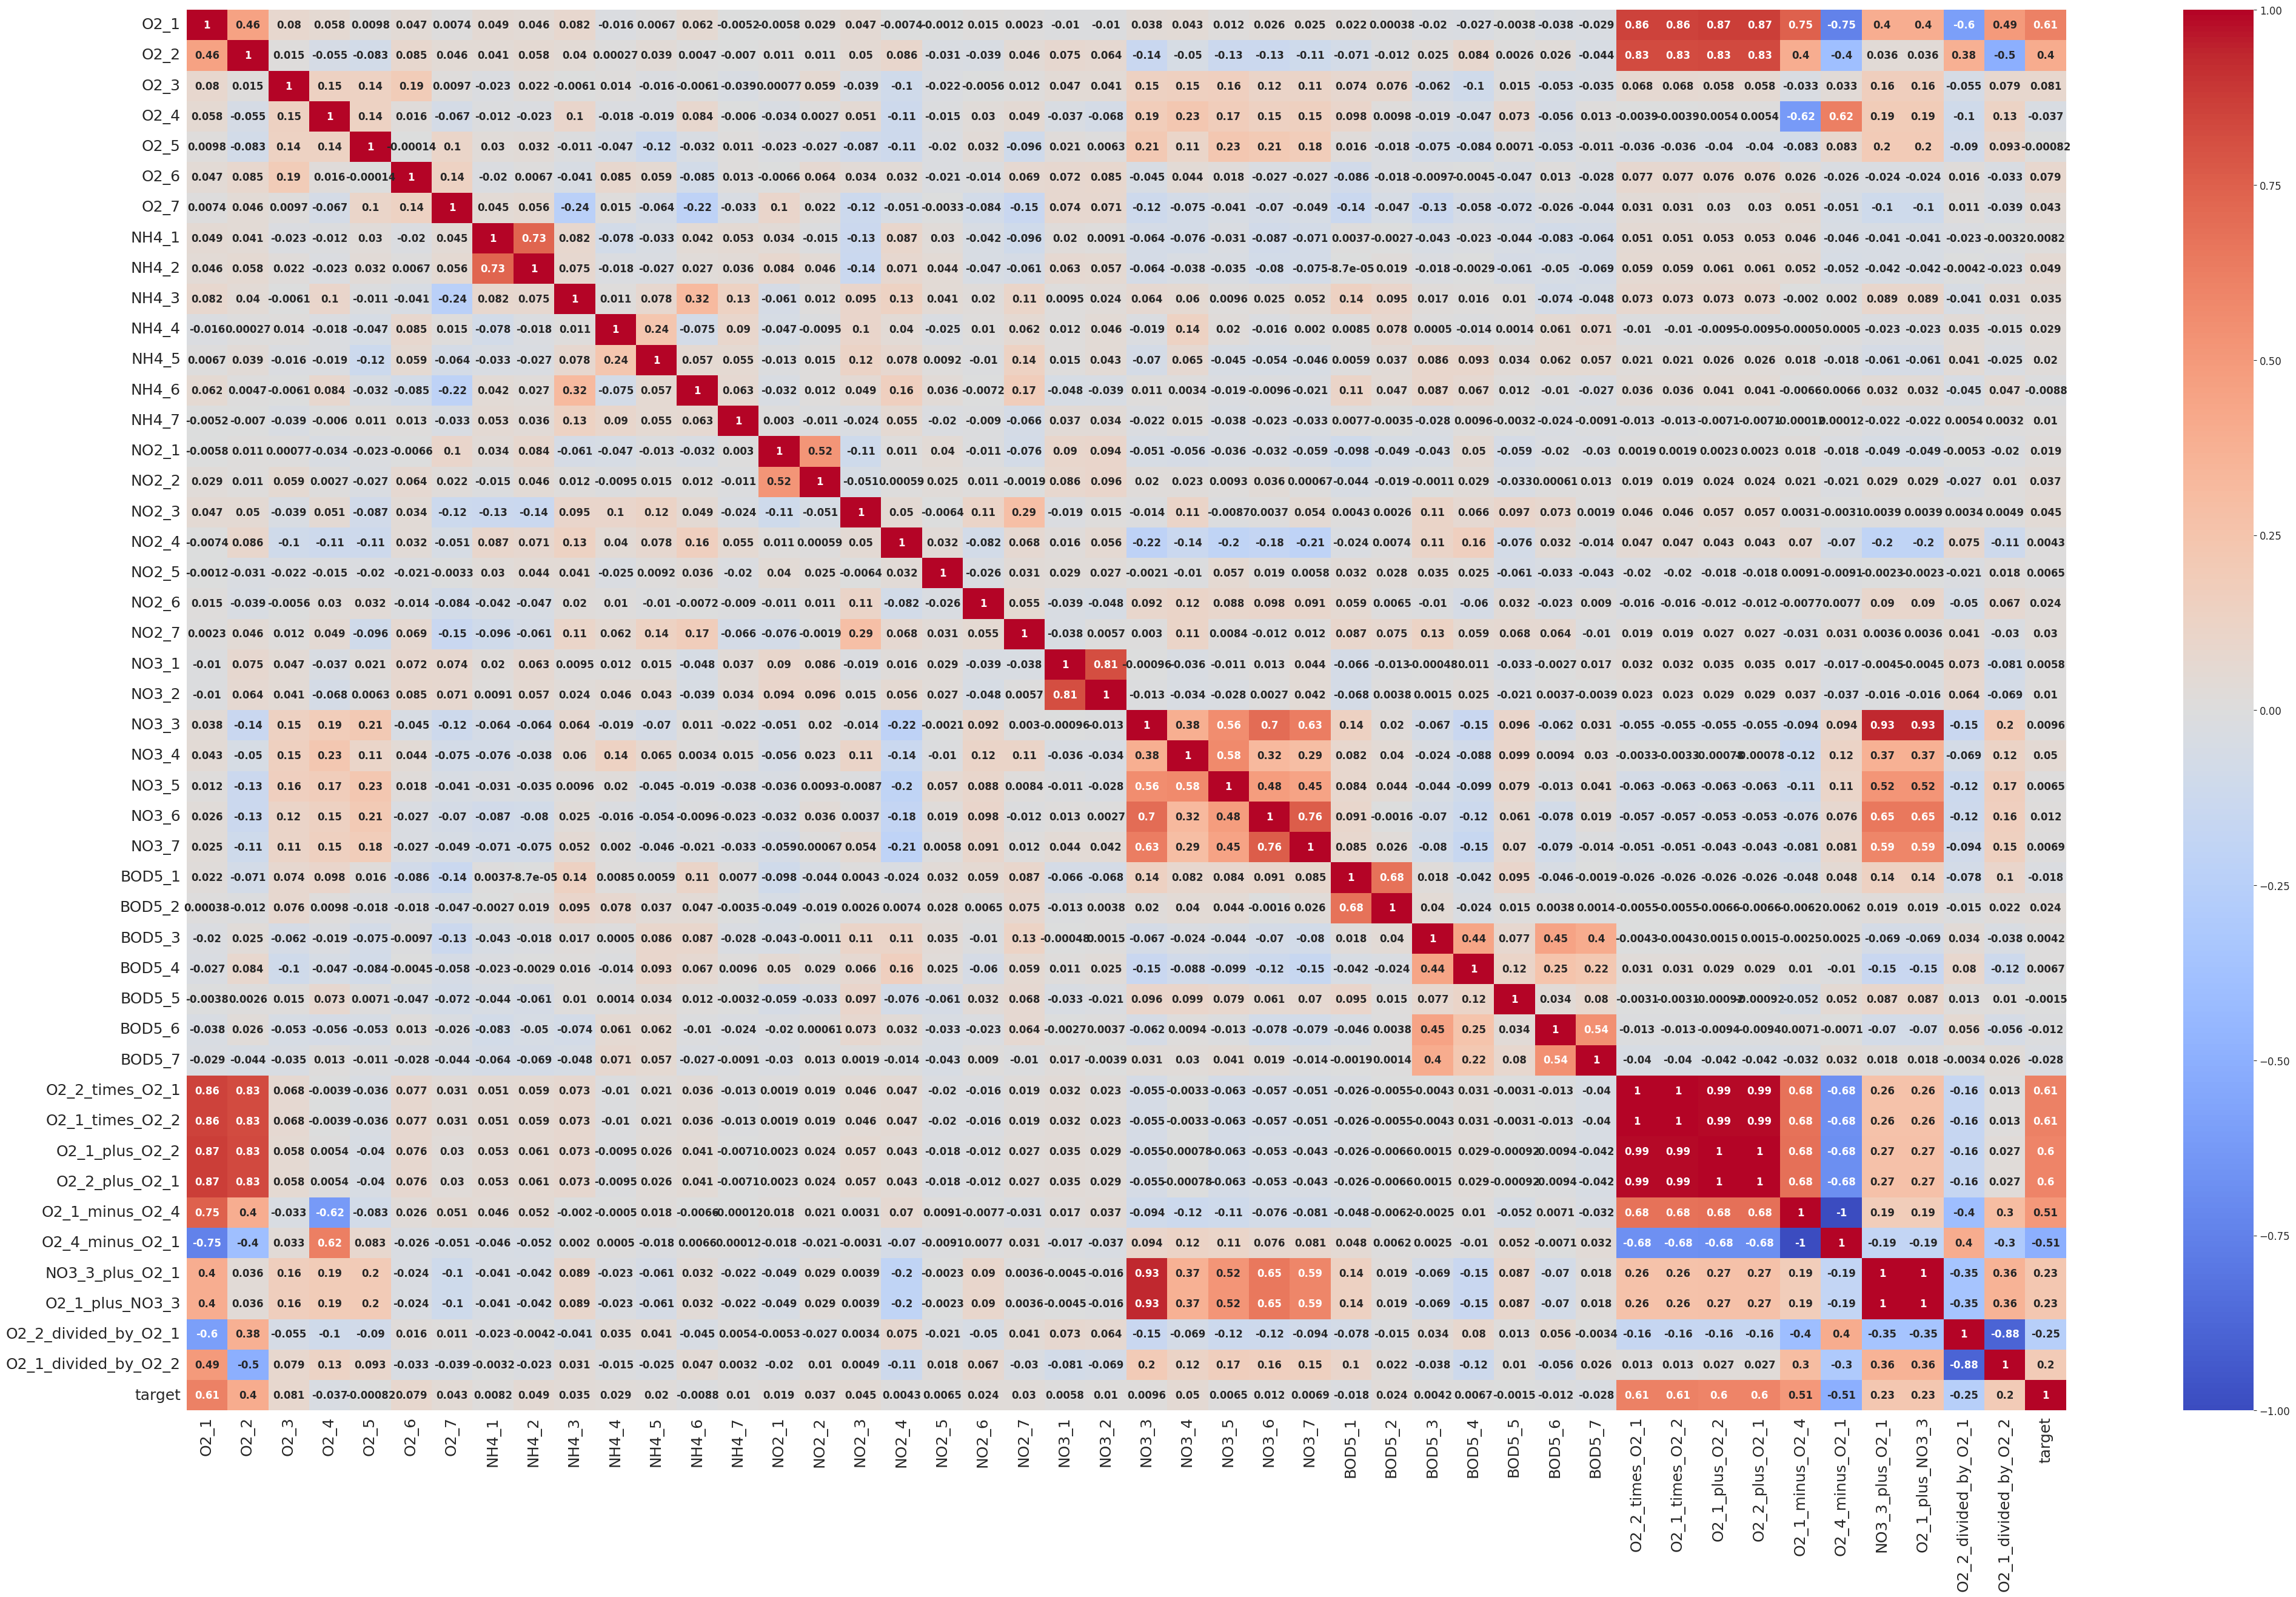

In [101]:
plt.figure(figsize=(50,30))
sns.heatmap(df_11.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 12, "weight": "bold"})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [102]:
correlation_matrix_11 = df_11.corr()

# Extract the correlations of the target variable with other variables
correlations_with_target_11 = correlation_matrix_11['target']

# Display the correlations with the target variable
print(correlations_with_target_11)

O2_1                    0.614393
O2_2                    0.399701
O2_3                    0.080620
O2_4                   -0.036724
O2_5                   -0.000821
O2_6                    0.079234
O2_7                    0.042882
NH4_1                   0.008235
NH4_2                   0.048655
NH4_3                   0.034866
NH4_4                   0.029392
NH4_5                   0.019571
NH4_6                  -0.008821
NH4_7                   0.010364
NO2_1                   0.018735
NO2_2                   0.036795
NO2_3                   0.045316
NO2_4                   0.004289
NO2_5                   0.006504
NO2_6                   0.023874
NO2_7                   0.030039
NO3_1                   0.005841
NO3_2                   0.010238
NO3_3                   0.009632
NO3_4                   0.050368
NO3_5                   0.006534
NO3_6                   0.011764
NO3_7                   0.006902
BOD5_1                 -0.017687
BOD5_2                  0.023696
BOD5_3    

In [103]:
correlation_matrix_11

O2_1      O2_2      O2_3      O2_4      O2_5  \
O2_1                  1.000000  0.457290  0.080275  0.057584  0.009818   
O2_2                  0.457290  1.000000  0.015321 -0.054776 -0.082869   
O2_3                  0.080275  0.015321  1.000000  0.145219  0.139641   
O2_4                  0.057584 -0.054776  0.145219  1.000000  0.136137   
O2_5                  0.009818 -0.082869  0.139641  0.136137  1.000000   
O2_6                  0.046628  0.084904  0.192506  0.016016 -0.000138   
O2_7                  0.007360  0.045752  0.009702 -0.067471  0.101997   
NH4_1                 0.048737  0.040804 -0.022955 -0.011784  0.030321   
NH4_2                 0.046394  0.058496  0.021855 -0.023257  0.031500   
NH4_3                 0.082113  0.039876 -0.006056  0.100237 -0.011345   
NH4_4                -0.015650  0.000270  0.014042 -0.017767 -0.047328   
NH4_5                 0.006721  0.038792 -0.015807 -0.019065 -0.121796   
NH4_6                 0.062312  0.004659 -0.006121  0.083694 -0.031706   
NH4_7                -0.005196 -0.007021 -0.038675 -0.005962  0.010686   
NO2_1                -0.005832  0.010723  0.000770 -0.034420 -0.023367   
NO2_2                 0.029465  0.010878  0.059481  0.002660 -0.026736   
NO2_3                 0.047456  0.049810 -0.038816  0.051495 -0.087290   
NO2_4                -0.007441  0.086060 -0.101240 -0.114509 -0.111253   
NO2_5                -0.001151 -0.030684 -0.021627 -0.014996 -0.019743   
NO2_6                 0.015447 -0.038518 -0.005574  0.029857  0.032393   
NO2_7                 0.002316  0.046073  0.011587  0.049308 -0.095916   
NO3_1                -0.010059  0.074615  0.046533 -0.037056  0.020725   
NO3_2                -0.010151  0.064297  0.040757 -0.068337  0.006337   
NO3_3                 0.037517 -0.141257  0.147279  0.185765  0.210969   
NO3_4                 0.042975 -0.049582  0.153614  0.233538  0.108126   
NO3_5                 0.012031 -0.127999  0.158293  0.173682  0.227528   
NO3_6                 0.026499 -0.125125  0.116068  0.145521  0.210023   
NO3_7                 0.024854 -0.106181  0.112553  0.150970  0.184494   
BOD5_1                0.022184 -0.071091  0.074365  0.097938  0.016172   
BOD5_2                0.000382 -0.012432  0.075795  0.009762 -0.018205   
BOD5_3               -0.019624  0.024711 -0.062166 -0.019445 -0.075481   
BOD5_4               -0.027092  0.083502 -0.100060 -0.047313 -0.084033   
BOD5_5               -0.003785  0.002570  0.015424  0.073055  0.007064   
BOD5_6               -0.038140  0.025691 -0.053401 -0.055858 -0.052761   
BOD5_7               -0.029068 -0.043930 -0.034932  0.013159 -0.011250   
O2_2_times_O2_1       0.858475  0.825572  0.068335 -0.003868 -0.036071   
O2_1_times_O2_2       0.858475  0.825572  0.068335 -0.003868 -0.036071   
O2_1_plus_O2_2        0.871189  0.834995  0.058128  0.005390 -0.039673   
O2_2_plus_O2_1        0.871189  0.834995  0.058128  0.005390 -0.039673   
O2_1_minus_O2_4       0.748141  0.396025 -0.033389 -0.619358 -0.082761   
O2_4_minus_O2_1      -0.748141 -0.396025  0.033389  0.619358  0.082761   
NO3_3_plus_O2_1       0.397586  0.036356  0.164384  0.191482  0.197279   
O2_1_plus_NO3_3       0.397586  0.036356  0.164384  0.191482  0.197279   
O2_2_divided_by_O2_1 -0.598037  0.377886 -0.055176 -0.100265 -0.089622   
O2_1_divided_by_O2_2  0.492930 -0.503077  0.079292  0.125108  0.093038   
target                0.614393  0.399701  0.080620 -0.036724 -0.000821   

                          O2_6      O2_7     NH4_1     NH4_2     NH4_3  ...  \
O2_1                  0.046628  0.007360  0.048737  0.046394  0.082113  ...   
O2_2                  0.084904  0.045752  0.040804  0.058496  0.039876  ...   
O2_3                  0.192506  0.009702 -0.022955  0.021855 -0.006056  ...   
O2_4                  0.016016 -0.067471 -0.011784 -0.023257  0.100237  ...   
O2_5                 -0.000138  0.101997  0.030321  0.031500 -0.011345  ...   
O2_6                  1.000000  0.136250 -0.020266  0.006713 -0.040837  .

In [104]:
index_to_drop = ['O2_1_times_O2_2', 'O2_1_plus_O2_2', 'O2_1_minus_O2_4', 'NO3_3_plus_O2_1']
correlations_with_target_11 = correlations_with_target_11.drop(index_to_drop)

In [105]:
top_10_corr_vars = correlations_with_target_11.abs().sort_values(ascending=False).head(11)
top_10_corr_vars

target                  1.000000
O2_2_times_O2_1         0.614496
O2_1                    0.614393
O2_2_plus_O2_1          0.600806
O2_4_minus_O2_1         0.507575
O2_2                    0.399701
O2_2_divided_by_O2_1    0.251581
O2_1_plus_NO3_3         0.231954
O2_1_divided_by_O2_2    0.200891
O2_3                    0.080620
O2_6                    0.079234
Name: target, dtype: float64

In [106]:
top_10_corr_vars = pd.DataFrame(top_10_corr_vars)
top_10_corr_vars

target
target                1.000000
O2_2_times_O2_1       0.614496
O2_1                  0.614393
O2_2_plus_O2_1        0.600806
O2_4_minus_O2_1       0.507575
O2_2                  0.399701
O2_2_divided_by_O2_1  0.251581
O2_1_plus_NO3_3       0.231954
O2_1_divided_by_O2_2  0.200891
O2_3                  0.080620
O2_6                  0.079234

In [107]:
index_to_drop = 'target'
top_10_corr_vars = top_10_corr_vars.drop(index_to_drop)
top_10_corr_vars

target
O2_2_times_O2_1       0.614496
O2_1                  0.614393
O2_2_plus_O2_1        0.600806
O2_4_minus_O2_1       0.507575
O2_2                  0.399701
O2_2_divided_by_O2_1  0.251581
O2_1_plus_NO3_3       0.231954
O2_1_divided_by_O2_2  0.200891
O2_3                  0.080620
O2_6                  0.079234

In [108]:
row_index = 'O2_4_minus_O2_1'
column_name = 'target'
new_value = -0.500574
top_10_corr_vars.at[row_index, column_name] = new_value
top_10_corr_vars

target
O2_2_times_O2_1       0.614496
O2_1                  0.614393
O2_2_plus_O2_1        0.600806
O2_4_minus_O2_1      -0.500574
O2_2                  0.399701
O2_2_divided_by_O2_1  0.251581
O2_1_plus_NO3_3       0.231954
O2_1_divided_by_O2_2  0.200891
O2_3                  0.080620
O2_6                  0.079234

In [109]:
row_index = 'O2_2_divided_by_O2_1'
column_name = 'target'
new_value = -0.246726
top_10_corr_vars.at[row_index, column_name] = new_value
top_10_corr_vars.head()

target
O2_2_times_O2_1  0.614496
O2_1             0.614393
O2_2_plus_O2_1   0.600806
O2_4_minus_O2_1 -0.500574
O2_2             0.399701

In [111]:
top_10_corr_vars

target
O2_2_times_O2_1       0.614496
O2_1                  0.614393
O2_2_plus_O2_1        0.600806
O2_4_minus_O2_1      -0.500574
O2_2                  0.399701
O2_2_divided_by_O2_1 -0.246726
O2_1_plus_NO3_3       0.231954
O2_1_divided_by_O2_2  0.200891
O2_3                  0.080620
O2_6                  0.079234

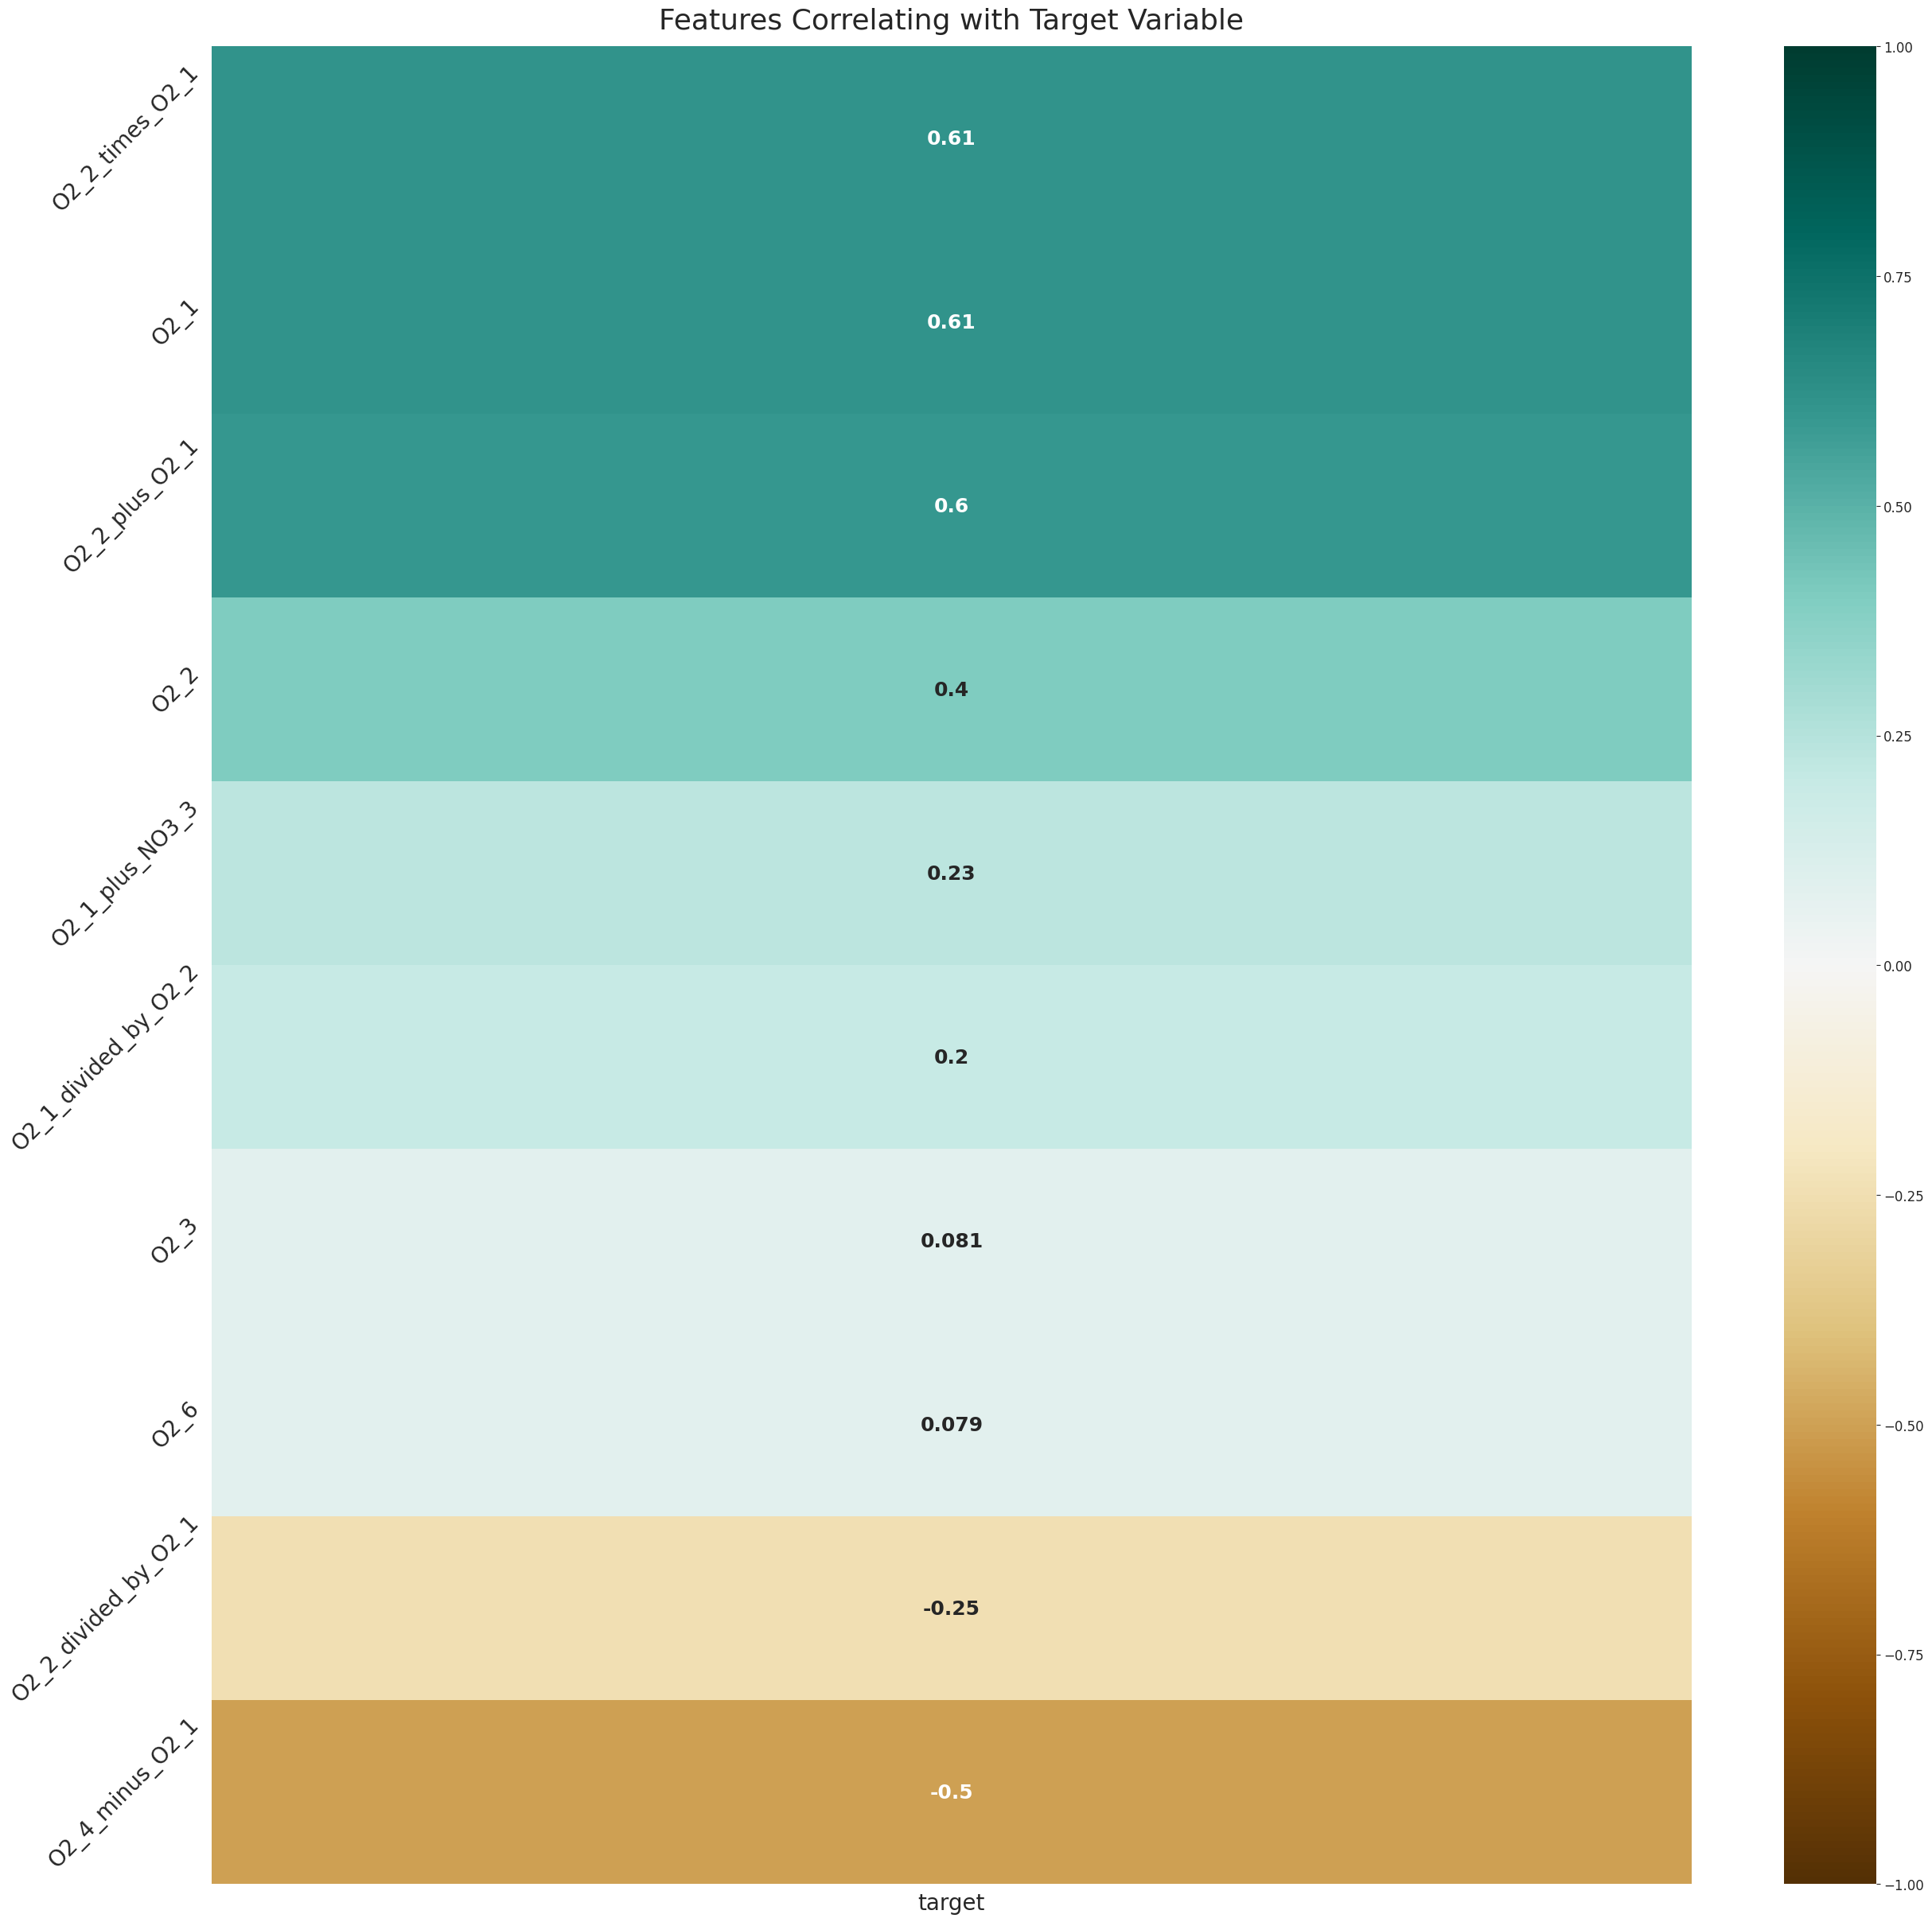

In [110]:
plt.figure(figsize=(30,30))
heatmap = sns.heatmap(top_10_corr_vars[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={'fontsize': 18})
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=20)
plt.yticks(rotation=45)
for text in heatmap.texts:
    text.set_weight('bold')
heatmap.set_title('Features Correlating with Target Variable', fontdict={'fontsize':26}, pad=16);

In [112]:
tcv = top_10_corr_vars
tcv.index

Index(['O2_2_times_O2_1', 'O2_1', 'O2_2_plus_O2_1', 'O2_4_minus_O2_1', 'O2_2',
       'O2_2_divided_by_O2_1', 'O2_1_plus_NO3_3', 'O2_1_divided_by_O2_2',
       'O2_3', 'O2_6'],
      dtype='object')

In [113]:
top_10_df = df_11[['O2_2_times_O2_1', 'O2_1', 'O2_2_plus_O2_1', 'O2_4_minus_O2_1', 'O2_2',
       'O2_2_divided_by_O2_1', 'O2_1_plus_NO3_3', 'O2_1_divided_by_O2_2',
       'O2_6', 'O2_3']]
top_10_df.head()

O2_2_times_O2_1  O2_1  O2_2_plus_O2_1  O2_4_minus_O2_1  O2_2  \
ID                                                                 
0          0.078557  3.71        0.190518         0.974423  5.42   
1          0.350864  8.05        0.525919         0.666075  8.65   
2          0.413368  9.00        0.583518         0.587922  9.00   
3          0.295344  7.35        0.470536         0.705151  8.10   
4          0.263590  6.40        0.441737         0.685613  8.40   

    O2_2_divided_by_O2_1  O2_1_plus_NO3_3  O2_1_divided_by_O2_2   O2_6    O2_3  
ID                                                                              
0               0.378214         0.171099              0.134727  10.07   8.770  
1               0.250515         0.274764              0.220792  10.07   7.960  
2               0.225881         0.841257              0.245046   8.98  11.475  
3               0.259606         0.245445              0.212670   8.98   9.545  
4               0.329163         0.624293              0.161793  10.07   8.370

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/si

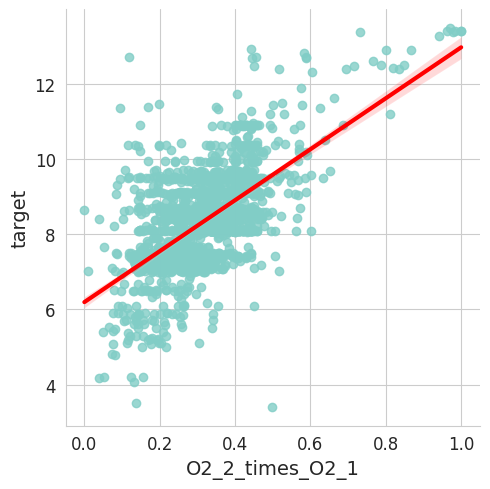

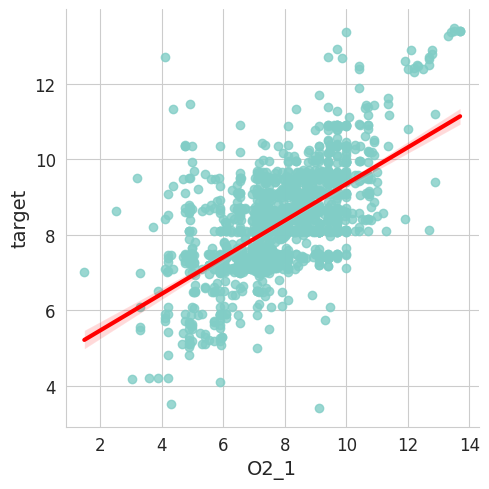

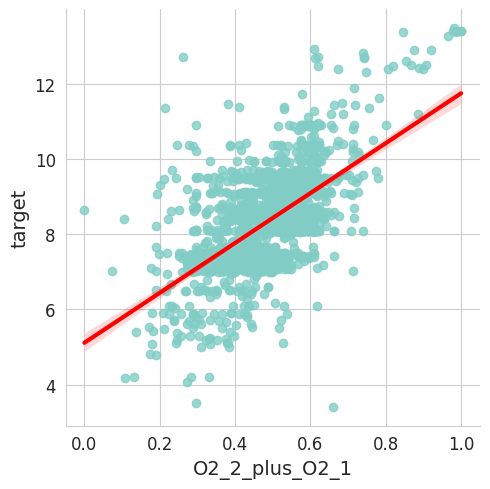

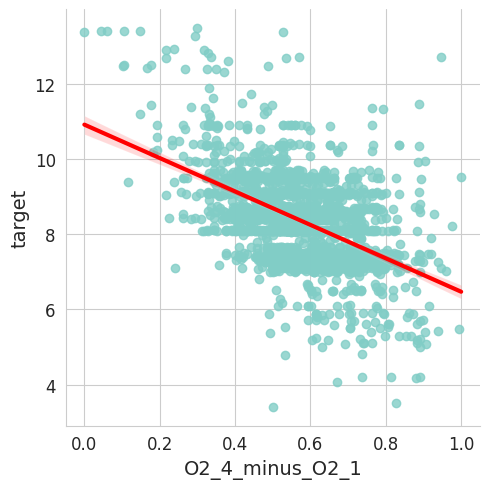

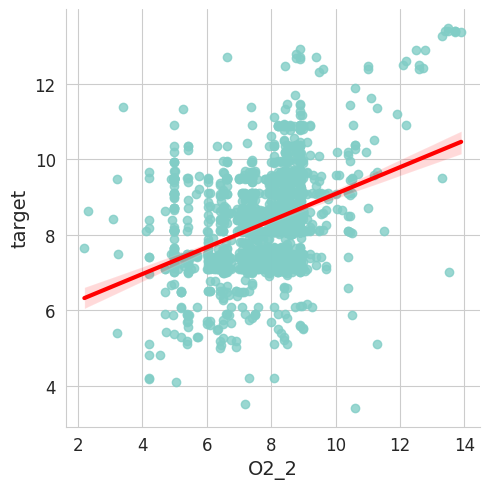

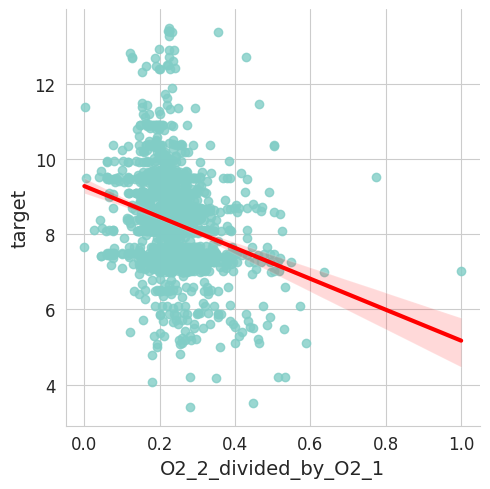

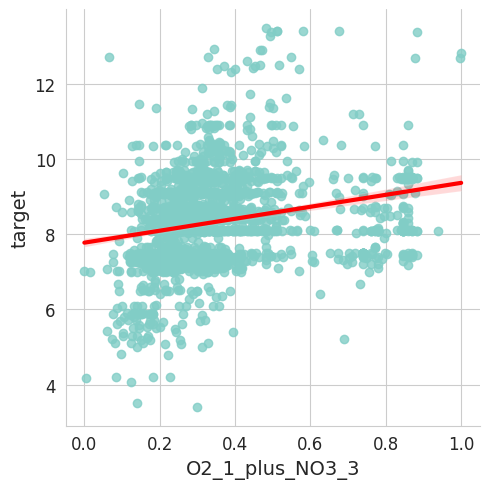

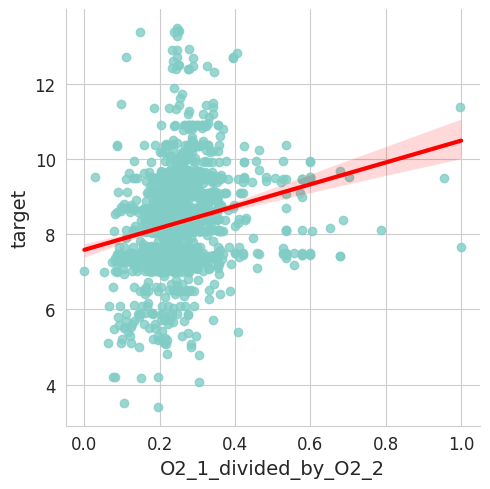

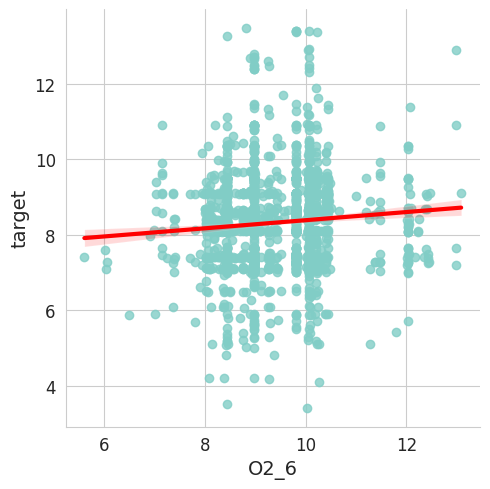

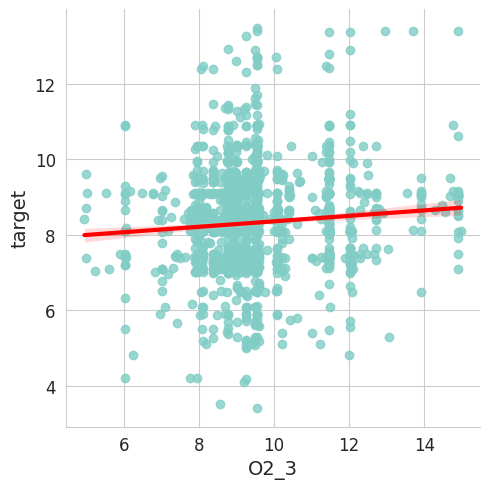

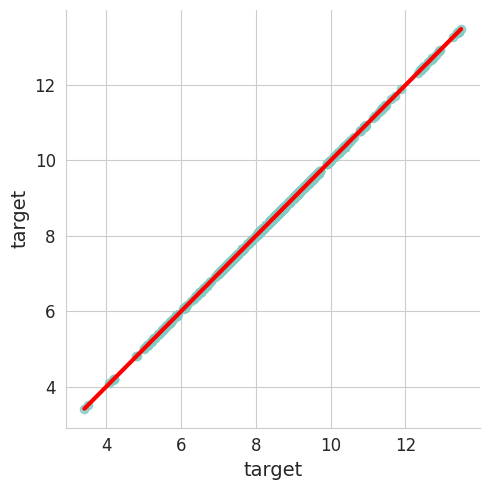

In [124]:
# Define a custom style as a dictionary
custom_style = {
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (8, 6),
    'lines.linewidth': 2,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    # Add any other style parameters you want to customize
}

# Set the custom style
plt.rcParams.update(custom_style)

# Assuming you have defined 'data' and 'top_10_df' earlier in your code
for col in top_10_df:
    # Create an lmplot for the current column
    sns.lmplot(data=df_11, x=col, y="target", scatter_kws={"color": '#81cdc6'}, line_kws={"color": 'red'})

# Ensure the plots are nicely arranged
plt.tight_layout()

# Show the plots
plt.show()

In [125]:
top_10_df = df_11[['O2_2_times_O2_1', 'O2_1', 'O2_2_plus_O2_1', 'O2_4_minus_O2_1', 'O2_2',
       'O2_2_divided_by_O2_1', 'O2_1_plus_NO3_3', 'O2_1_divided_by_O2_2',
       'O2_6', 'O2_3', 'target']]

In [126]:
Xtop = top_10_df.drop('target', axis=1)
ytop = top_10_df['target']

In [127]:
Xtop.shape

(2214, 10)

[-0.74994479 -0.90129812 -0.9186315  -0.80082101 -0.77258594]


<Axes: >

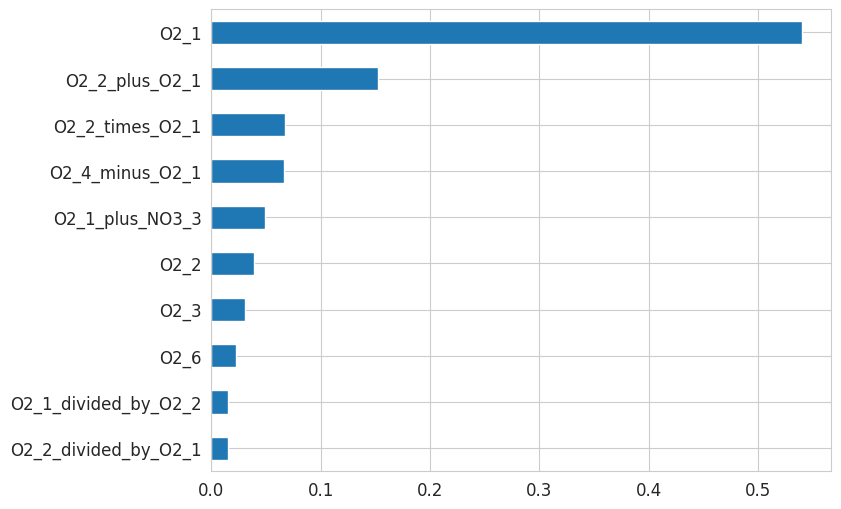

In [128]:
print(cross_val_score(rf, Xtop , ytop, cv = 5, scoring = 'neg_mean_squared_error'))
rf.fit(Xtop, ytop)
feat_importances = pd.Series(rf.feature_importances_, index=Xtop.columns)
feat_importances.nsmallest(35).plot(kind='barh')